# Анализ данных по продажам игр для интернет-магазина

## Оглавление   
[1 Описание проекта](#description)   
- [1.1 Описание данных](#data)    

[2 Загрузка данных](#downloading)    
- [2.1  Выводы по разделу](#conclusion1)

[3 Предобработка данных](#prepare)    
- [3.1  Дубликаты](#duplicated)    
- [3.2  Пропуски](#gaps)   
- [3.3  Выводы по разделу](#conclusion2)

[4  Анализ рынка](#market_research)
- [4.1  Выпуск игр по годам](#market_count)    
- [4.2  Продажи игр по платформам](#m_platform)    
- [4.3  Динамика продаж по платформам](#m_platform_years)     
- [4.4  Лайфтайм платформ](#m_platform_lifetime)     
- [4.5  Перспективные платформы](#m_platform_best)     
- [4.6  Динамика продаж актуальных платформ](#m_platform_best_sales)     
- [4.7  Продажи игр по платформам](#m_platform_best_sales_box)     
- [4.8  Зависимость количества проданных игр от отзывов](#m_corr_sales_feedback)        
- [4.9  Зависимость продаж игр от жанра](#m_corr_sales_genre)           
- [4.10  Выводы по разделу](#conclusion3)

[5  Портрет пользователя](#user_research)          
- [5.1  Самые популярные платформы (топ-5)](#u_platform)    
- [5.2  Самые популярные жанры (топ-5)](#u_genre)     
- [5.3  Влияние рейтинга ESRB](#u_esrb)      
- [5.4  Выводы по разделу](#conclusion4)    

[6  Проверка гипотез](#hypothesis)    
- [6.1  Гипотеза о пользовательских рейтингах платформ](#h_platform)         
- [6.2  Гипотеза о пользовательских рейтингах жанров](#h_genre)     
- [6.3  Выводы по разделу](#conclusion5)    

[7  Результаты исследования](#result)    

### Описание проекта <a id='description'></a>

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Сейчас декабрь 2016 г., и необходимо спланировать кампанию на 2017-й. Чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании, нужно выявить определяющие успешность игры закономерности.
Исследование проводится на основе исторических данных о продажах игр до 2016 года, полученных из открытых источников: оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)

#### Описание данных <a id='data'></a>

Таблица `games.csv` содержит исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах до 2016 года. Данные за 2016 год могут быть неполными. Таблица состоит из следующих полей:    

- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.    

### Загрузка данных <a id='downloading'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as st

warnings.filterwarnings('ignore')

Загрузим таблицу `games.csv` с историческими данными о продажах игр, оценках пользователей и экспертов, жанрах и платформах

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv', sep=',')
except:
    data = pd.read_csv('games.csv', sep=',')
    
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Загрузка прошла без ошибок, в формате значений столбца `Year_of_Release` прослеживаются лишние артефакты. Приведём названия столбцов к "змеиному регистру" и посмотрим иноформацию о датасете 

In [3]:
data.columns = [x.lower().replace(' ', '_') for x in data.columns.values]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Вывод:    <a id='conclusion1'></a>
Загрузка прошла без ошибок, в таблице содержится 16715 записей, что является достаточной выборкой для проведения исследования. Названия столбцов приведены к "змеиному регистру". В формате значений столбца Year_of_Release прослеживаются лишние артефакты, которые предстоит убрать. Не все типы данных соответствуют содержащейся информации: тип данных в столбце `year_of_release` должен быть преобразован из 'object' в 'int' для отслеживания изменений данных во времени; тип данных в столбце `user_score` должен быть преобразован из 'object' в 'float' для исследования и построения графиков. Также в данных присутствуют пропуски, которые предстоит обработать

### Предобработка <a id='prepare'></a>

#### Дубликаты <a id='duplicated'></a>
Проверим наличие дубликатов в данных

In [4]:
data.duplicated().sum()

0

Полные дубликаты отсутствуют. Посмотрим неявные дубликаты, для этого сначала выведем уникальные категориальные данные, и посмотрим, не закрались ли туда дублированные значения

In [5]:
category_columns = ['platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
for col in category_columns:
    print('Столбец', col, 'уникальные значения:\n', data[col].unique(), '\n')

Столбец platform уникальные значения:
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 

Столбец year_of_release уникальные значения:
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.] 

Столбец genre уникальные значения:
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan] 

Столбец critic_score уникальные значения:
 [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 3

В категориях неявных дубликатов нет, теперь проверим столбец `name`: удалим пробелы в начале и конце названия, сделаем символы строчными и проверим, есть ли дублированные значения по имени и платформе

In [6]:
data_search = data.copy()
data_search['name'] = [str(x).lower().strip() for x in data_search['name']]
duplicated_data = data_search.duplicated(subset=['name', 'platform'])
d_names = data_search[duplicated_data]['name']
for name in d_names.unique():
    display(data_search.loc[data_search['name'] == name])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,need for speed: most wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,need for speed: most wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,need for speed: most wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,need for speed: most wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,need for speed: most wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,sonic the hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,sonic the hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,sonic the hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,sonic the hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,nan,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,nan,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,madden nfl 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,madden nfl 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,madden nfl 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,madden nfl 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,madden nfl 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Для "Need for Speed: Most Wanted" платформы X360 и PC встречаются два раза, но релизы проршли в разные годы, видимо это просто переиздание.
Для игры с дублированным пропуском в названии отсутствует содерательная информация в строках, удалим их в ходе обработки пропусков.    

С игрой "Sonic the Hedgehog" платформа PS3 подставила нас: при прочих равных категориальных значениях для неё, европейские продажи были вынесены в отдельную строку, возможно произошел какой-то сбой учёта или выгрузки. Суммируем европейские продажи для PS3 и удалим отдельную европейскую строку

In [7]:
data.loc[1745, ['eu_sales']] = data.loc[1745, ['eu_sales']] + data.loc[4127, ['eu_sales']]
data = data.drop([4127])
data.loc[data['name'] == 'Sonic the Hedgehog']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.54,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+


С игрой "Madden NFL 13" таже картина от платформы PS3 - европейские продажи вынесены в отдельную строку. Обработаем их по той же схеме - суммируем европейские продажи для PS3 и удалим отдельную европейскую строку

In [8]:
data.loc[604, ['eu_sales']] = data.loc[604, ['eu_sales']] + data.loc[16230, ['eu_sales']]
data = data.drop([16230])
data.loc[data['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


#### Пропуски <a id='gaps'></a>
Посмотрим подробнее на пропуски

In [9]:
data.isnull().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     268
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Значительное количество пропусков присутствует в столбцах `critic_score`, `user_score` и `rating`. Заполнить их релевантными значениями не представляется возможным, поэтому разберёмся поочереди с проблемными столбцами, начнём с рейтинга:

#### Столбец "rating"    
Уникальные значения:

In [10]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Среди значений присутствует аббревиатура "RP" (Rating Pending) это означает что игра была отправлена на оценку в ESRB (Entertainment Software Rating Board) и ожидает присвоения рейтинга. Такие значения обработаем также как и пропуски.
**Пропуски и значения "RP"** в колонке `rating` **заменим на 'unknown'**

In [11]:
data['rating'] = data['rating'].fillna('unknown')
data.loc[data['rating'] == 'RP', 'rating'] = 'unknown'

#### Столбец "user_score"    
Уникальные значения:

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Поле `user_score` содержит значения 'tbd' - они сообщают, что данные ещё не накоплены. Посмотрим количесчество таких значений:

In [13]:
data[data['user_score']=='tbd']['user_score'].count()

2424

Значение встречается в 2421 записи, заполнить эти знаечния не представляется возможным, поэтому **замени их на 'nan'** и 
с помощью метода "to_numeric" приведем тип данных колонки `user_score` к **числовому типу**. Поскольку данные этого столбца нам нужны для построения графиков и расчётов корреляции, заполнять пропуски заглушками не будем и **оставим пропуски незаполненными**, чтобы они не вносили искажения

In [14]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

#### Столбец "critic_score"    
Уникальные значения:

In [15]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Колонка `critic_score` содержит только числовые значения оценок критиков и пропуски. Поскольку данные этого столбца нам нужны для построения графиков и расчётов корреляции, заполнять пропуски заглушками или медианными значениями не будем и **оставим пропуски незаполненными**, чтобы они не вносили искажения

#### Столбец "name"    
Столбец содержит два пропуска, посмотрим что с ними не так:

In [16]:
data.loc[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


Содержательная информация в строках отсутствует, **удалим их**

In [17]:
data = data.dropna(subset=['name'])

#### Столбец "year_of_release"    
В нём 268 пропусков, но их можно попробовать восстановить из имеющихся и открытых данных. Чтобы провести сборку данных, сначала приведём значения в столбце `year_of_release` к типу "int", уберём из них лишние артефакты, временно заменим пропуски на 0

In [18]:
def year_maker(year_str):
    
    year_str = str(year_str)
    year_str = year_str[0:4]
    if year_str == 'nan':
        year_str = 0
    return int(year_str)

data['year_of_release'] = data['year_of_release'].apply(year_maker)

Далее проработаем пропуски в этом столбце: для некоторых игр, у которых отсутствует дата релиза на конкретной платформе, есть значения даты релиза на других платформах и часть пропусков можно восстановить из них. В большинстве случаев разница в дате выхода игры для разных платформ не превышает года, такой точности для нашего исследования будет достаточно. **Посмотрим, в каком году игра с пропущенным годом релиза выходила на других платформах и присвоим его**

In [19]:
g_list = data.loc[data['year_of_release'] == 0]['name']
for element in g_list:
    dates = data.loc[data['name'] == element]['year_of_release']
    data.loc[(data['name'] == element) & (data['year_of_release'] == 0), 'year_of_release'] = dates.max()
data.loc[data['year_of_release'] == 0]['name'].count()

146

После заполнения пропусками данными с других платформ осталось 146 игр с пропуском в дате релиза, эти данные находятся в открытом доступе, проведём парсинг нескольких сайтов с информацией о играх, внесём полученные данные в списки и сформируем из них датафрейм

In [20]:
lost_year_list = [1999,2011,1984,2007,2005,2001,1998,2002,2010,2004,
                  2011,2008,2008,2008,2010,2011,2002,2001,2008,2004,
                  2000,2002,2005,2012,2002,2004,2011,2010,2001,2011,
                  2010,2010,2001,2009,2003,2005,1996,2011,2011,1993,
                  2004,2003,2012,2006,2005,2010,2006,2005,2010,2016,
                  2005,2003,2003,2008,2004,2010,2015,2006,2010,2011,
                  2011,2007,2009,2009,2012,2009,2006,2009,2008,2005,
                  2009,2009,2008,2001,2010,2006,2008,2008,2012,2011,
                  2011,2016,2010,2007,2010,2012,2007,2006,2009,2009,
                  2006,2009,2007,2007,2009,2006,2009,2010,2010
                 ]
lost_name_list = ['Legacy of Kain: Soul Reaver','Jurassic Park: The Game','Sabre Wulf','Rock Band',
    'wwe Smackdown vs. Raw 2006',"Frogger's Adventures: Temple of the Frog",'Triple Play 99','Suikoden III',
    'Yakuza 4','The Chronicles of Riddick: Escape from Butcher Bay','Test Drive Unlimited 2',
    'Advance Wars: Days of Ruin','Silent Hill: Homecoming',"Robert Ludlum's The Bourne Conspiracy",
    'NHL Slapshot','TERA','NFL GameDay 2003','Harvest Moon: Save the Homeland',"Robert Ludlum's The Bourne Conspiracy",
    'All-Star Baseball 2005','The Dukes of Hazzard II: Daisy Dukes It Out','Haven: Call of the King',
    'Unreal Championship 2: The Liandri Conflict','Disgaea 3: Absence of Detention','Tribes: Aerial Assault',
    'Yu Yu Hakusho: Dark Tournament','Test Drive Unlimited 2','Backbreaker','Twisted Metal: Small Brawl',
    'Otomedius Excellent','Trauma Team','Backbreaker','Alone in the Dark: The New Nightmare','Vegas Party',
    'eJay Clubworld',"Disney's Cinderella: Magical Dreams",'Super Puzzle Fighter II','Dream Trigger 3D',
    'Yoostar on MTV','Tornado',"McFarlane's Evil Prophecy",'Drake of the 99 Dragons','Port Royale 3',
    'Alex Rider: Stormbreaker','Combat Elite: WWII Paratroopers',"Flip's Twisted World",
    "Tom Clancy's Rainbow Six: Critical Hour",'Drill Dozer','Tour de France 2011','Clockwork Empires',
    'Combat Elite: WWII Paratroopers','Super Duper Sumos','Tube Slider','Steal Princess','Virtua Quest',
    'Ferrari: The Race Experience','Homeworld Remastered Collection', 'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)',
    'Big Beach Sports 2','Move Fitness','Valkyria Chronicles III: Unrecorded Chronicles','DanceDanceRevolution II',
    'Our House Party!','Charm Girls Club: My Fashion Mall','Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God',
    'The Daring Game for Girls','Atsumare! Power Pro Kun no DS Koushien','My Healthy Cooking Coach',
    'Luminous Arc 2 (JP sales)','Egg Monster Hero','The Daring Game for Girls','Charm Girls Club: My Fashion Show',
    'Zero: Tsukihami no Kamen','Mega Man Battle Network: Operation Shooting Star','Build-A-Bear Workshop: Friendship Valley',
    'Chou Soujuu Mecha MG','Prinny: Can I Really Be The Hero? (US sales)','Mobile Ops: The One Year War',
    'Jewel Link Chronicles: Mountains of Madness','Reader Rabbit 2nd Grade','Half-Minute Hero 2','Housekeeping',
    'Swords','Bikkuriman Daijiten','Fullmetal Alchemist: Brotherhood','Combat Wings: The Great Battles of WWII',
    'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku','Payout Poker & Casino','Wii de Asobu: Metroid Prime',
    'Legacy of Ys: Books I & II','Saint',"Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)","Shonen Jump's Yu-Gi-Oh! GX Card Almanac",
    'Jet Impulse','Dream Dancer','Football Manager 2007','Shorts','Agarest Senki: Re-appearance','Hakuouki: Shinsengumi Kitan'
                 ]

lost_games = pd.DataFrame()
lost_games['name'] = lost_name_list
lost_games['release_year'] = lost_year_list
lost_games.shape

(99, 2)

Удалось обнаружить данны по году релиза для 99 игр. Внесём их в нашу таблицу

In [21]:
g_list = data.loc[(data['year_of_release'] == 0)]['name']
for element in g_list:
    tearget_year = lost_games.loc[lost_games['name'] == element]['release_year'].max()
    data.loc[data['name'] == element, 'year_of_release'] = tearget_year
    
data.loc[data['year_of_release'].isna() == True]['name'].count()

39

Осталось 39 игр с неизвестной датой релиза, **удалим их**, поскольку в исследовании нам важно учитывать изменение тенденций во времени, а удаление данных о 39 играх не повлияет на репрезентативность выборки

In [22]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int')



Для дальнейшего исследования посчитаем суммарные продажи во всех регионах и внесём их в таблицу

#### Столбец "total_sales"    
Для исследования нам понадобятся данные о суммарных продажах игр по всем регионам. Посчитаем суммарные продажи и внесём их в столбец `total_sales`

In [23]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Посмотрим описание итогового датафрейма

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16672 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16672 non-null  object 
 1   platform         16672 non-null  object 
 2   year_of_release  16672 non-null  int32  
 3   genre            16672 non-null  object 
 4   na_sales         16672 non-null  float64
 5   eu_sales         16672 non-null  float64
 6   jp_sales         16672 non-null  float64
 7   other_sales      16672 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7587 non-null   float64
 10  rating           16672 non-null  object 
 11  total_sales      16672 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


#### Вывод: <a id='conclusion2'></a>

Полные дубликаты не были обнаружены. Обнаружено два неявных дубликата, отображающих продажи PS3 отдельно для европейского рынка. Данные о продажах были объединены, строки-дубликаты удалены.    

В процессе предобработки пропуски были обнаружены в столбцах critic_score, user_score, name, year_of_release, genre и rating:   

- Столбец "rating": обнаружено 6766 пропусков, cреди значений присутствовала аббревиатура "RP" (Rating Pending) это означает что игра была отправлена на оценку в ESRB (Entertainment Software Rating Board) и ожидает присвоения рейтинга. Такие значения были обработаны также как и пропуски - заменены на 'unknown'.

- Столбец "user_score": обнаружено 6701 пропусков, поле содержало значения 'tbd', сообщающие, что данные ещё не накоплены, такое значение встречалось в 2421 записи, заполнить эти знаечния не представлялось возможным, поэтому они были заменены на 'nan'. Поскольку данные этого столбца нам нужны для построения графиков и расчётов корреляции, пропуски оставили незаполненными, чтобы они не вносили искажения. Тип данных колонки приведён к формату 'float64'.

- Столбец "critic_score": обнаружено 8578 пропусков, содержит только числовые значения оценок критиков и пропуски. Поскольку данные этого столбца нам нужны для построения графиков и расчётов корреляции, не стали заполнять пропуски заглушками или медианными значениями и оставили пропуски незаполненными, чтобы они не вносить искажения.

- Столбец "name": содержал два пропуска, cодержательная информация в строках отсутствовала, они были удалены.

- Столбец "genre": содержал два пропуска в тех же строках, что и у столбца "name", они были удалены.

- Столбец "year_of_release": обнаружено 268 пропусков, часть из них была восстановлена из имеющихся данных, поскольку для некоторых игр, у которых отсутствует дата релиза на конкретной платформе, есть значения даты релиза на других платформах и часть пропусков была восстановлена из них. После заполнения пропусков данными с других платформ, осталось 146 игр с пропуском в дате релиза, поскольку эти данные находятся в открытом доступе, парсингом нескольких сайтов с информацией о играх удалось обнаружить данные по году релиза для 99 игр, которые также были внесены в датафрейм. После заполнения пропусков осталось 39 игр с неизвестной датой релиза, они были удалены, поскольку в исследовании нам важно учитывать изменение тенденций во времени, а удаление данных о 39 играх не повлияет на репрезентативность выборки. Значения в столбце year_of_release приведены к типу "int" и из них были убраны лишние артефакты.     

Для дальнейшего исследования были посчитаны суммарные продажи во всех регионах и внесены в столбец "total_sales"

Итоговая таблица содержит 16672 записи о продажах игр на различных платформах, пропуски были оставлены только в столбцах critic_score и user_score. После преобразований типы данных в таблице соответствуют содержащейся в столбцах информации. Дубликаты отсутствуют. Cуммарные продажи игр по регионам внесены в столбец total_sales. Итоговая выборка является достаточной для проведения исследования, данные готовы для дальнейшего анализа

### Анализ рынка <a id='market_research'></a>

#### Выпуск игр по годам <a id='market_count'></a>
Посмотрим, сколько игр выпускалось в разные годы 

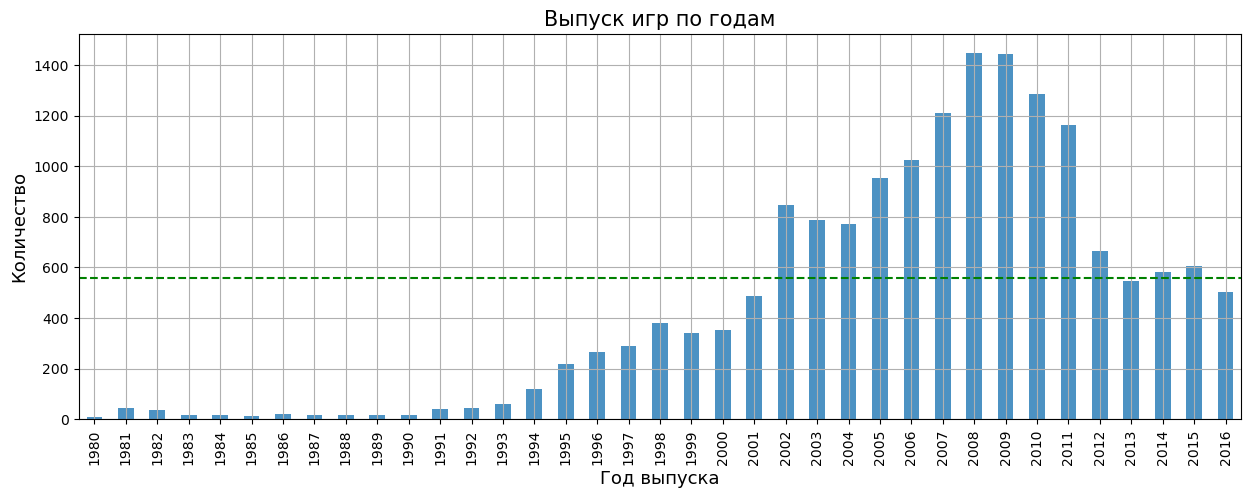

In [25]:
games_by_year = data.pivot_table(index='year_of_release', aggfunc={'name':'count'})
games_by_year.columns = ['games_count']
games_by_year.plot(y='games_count', kind='bar', figsize=(15, 5), legend=False, alpha=0.8, grid=True)
plt.axhline(y=560, color='green', linestyle='--')
plt.title(label='Выпуск игр по годам', fontsize=15)
plt.xlabel('Год выпуска', fontsize=13)
plt.ylabel('Количество', fontsize=13)
plt.show()

График количества выпускаемых игр по годам показывает, что рынок прошел несколько периодов:
1) Период стабильности с 1980 по 1992.
2) Период плавного роста с 1993 по 2000.
3) Резкий рост с  2001 по 2009.
4) Резкое падение с 2010 по 2012.
5) Стабилизация после 2012 года.    

Исходя из задачи прогнозирования продаж на 2017 год, нам важно отследить тренды, оказывающие влияние на текущий период, и исключить влияние на прогноз факторов, которые прекратили своё воздействие, поэтому в исследовании наиболее значимыми будут данные последнего периода стабилизации после 2012 года

In [26]:
games_by_year.query('year_of_release > 2012').agg({'games_count':['sum', 'mean']})

,games_count
sum,2240.0
mean,560.0


В интересующем нас периоде содержится 2240 записей, в среднем в год выпускается 560 игр. Не забываем, что 2016 год ещё не закончился, и данные за него не полные

#### Продажи игр по платформам <a id='m_platform'></a>
Посмотрим на рейтинг платформ с наибольшими суммарными продажами

,total_sales
platform,
PS2,1254.40
X360,971.42
PS3,939.65
Wii,907.51
DS,806.10
PS,730.73
GBA,316.46
PS4,314.14
PSP,294.05


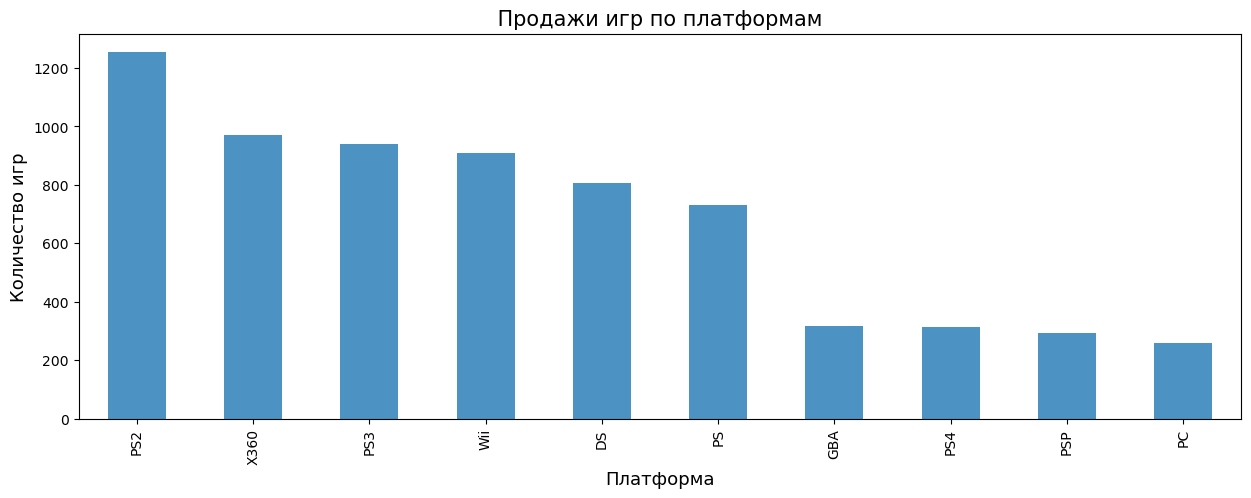

In [27]:
platform_top = (data.pivot_table(index=['platform'], aggfunc={'total_sales':sum}).nlargest(10, columns='total_sales'))
display(platform_top)
platform_top.plot(y='total_sales', kind='bar', figsize=(15, 5), legend=False, alpha=0.8)
plt.title(label=' Продажи игр по платформам ', fontsize=15)
plt.xlabel('Платформа', fontsize=13)
plt.ylabel('Количество игр', fontsize=13)
plt.show()

В топ-10 попали производители из разных стран, лидирует PS2, но и X360 не сильно отстаёт, в тройку лидеров попала и PS3. Замыкакет топ-10 по суммам продаж платформа PC

#### Динамика продаж по платформам <a id='m_platform_years'></a>
Посмотрим как по годам менялись суммарные продажи среди топ-10 платформ

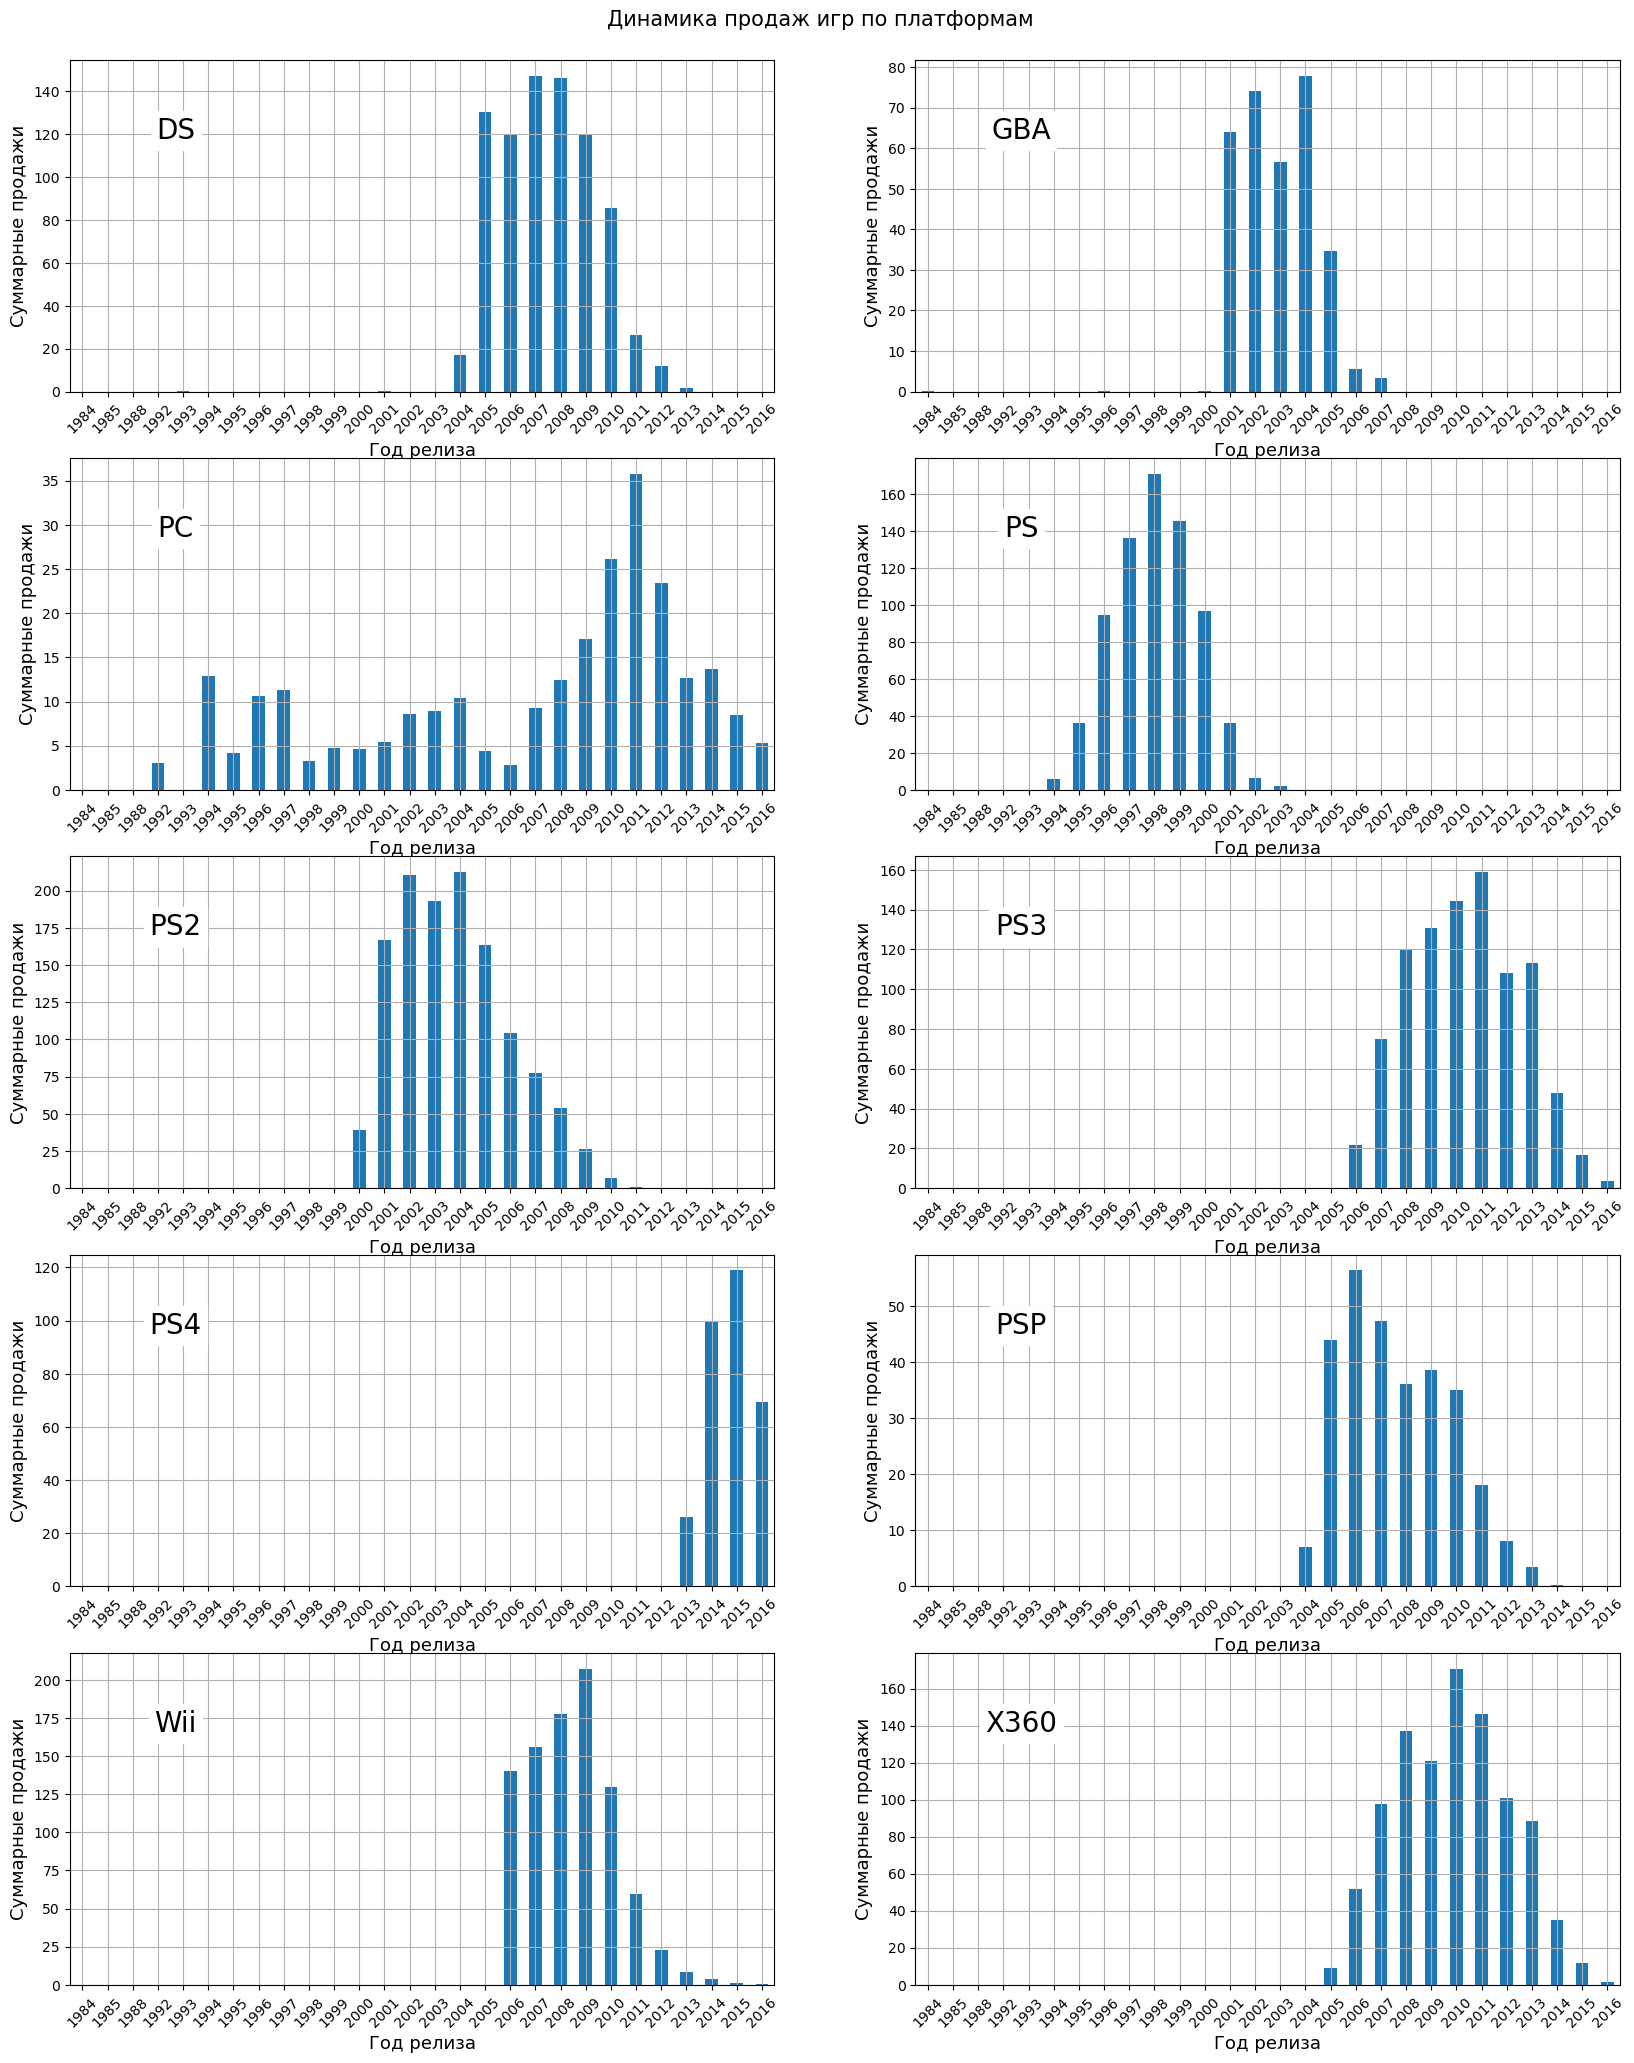

In [28]:
platform_10 = data.query('platform in @platform_top.index') \
                  .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
platform_10.reset_index(inplace=True)

fig = plt.figure(figsize=(20, 25))

i=1
for column in platform_10.columns:
    if column=='year_of_release':
        continue
    else:
        platform_10.plot(x='year_of_release', y=column, kind='bar',
        grid=True, legend=False, rot=45, alpha=1, ax=plt.subplot(5,2,i))
        plt.title(column, loc ='center', pad = 15, fontsize=20, \
             color='black', backgroundcolor='white', fontstyle='normal', y=0.7, x=0.15)
        plt.xlabel('Год релиза', fontsize=13, color='black')
        plt.ylabel('Суммарные продажи', fontsize=13, color='black')
        i+=1
        
fig.suptitle('Динамика продаж игр по платформам', y=0.9, fontsize = 15)
plt.show()

Среди топ-10 платформ по объёму продаж наиблее востребованной на данный момент является PS4. Стабильные, но невысокие показатели продаж показывает непотопляемая платформа PC, платформы X360 и PS3 на закате популярности. Остальные платформы из топа продаж утратили актуальность 

#### Лайфтайм платформ <a id='m_platform_lifetime'></a>
Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы

In [29]:
platform_lifetime = data.query('platform in @platform_top.index') \
                  .pivot_table(index='platform', values='year_of_release', aggfunc=[min, max])

platform_lifetime.columns = ['release', 'retired']
platform_lifetime['lifetime'] = platform_lifetime['retired'] - platform_lifetime['release']
display(platform_lifetime.sort_values('lifetime', ascending=False))
print('Медианный срок жизни платформы', platform_lifetime['lifetime'].median(), 'лет')
release_list = list(platform_lifetime['release'].sort_values().unique())
period = []
for i in range(len(release_list) - 1):
    period.append(release_list[i+1] - release_list[i])
print('Средний период выхода новых платформ:', np.average(period).round(1), 'года')

,release,retired,lifetime
platform,,,
DS,1985,2016,31
PC,1985,2016,31
GBA,1984,2007,23
PS2,2000,2011,11
PS3,2005,2016,11
PSP,2004,2015,11
X360,2005,2016,11
Wii,2006,2016,10
PS,1994,2003,9


Медианный срок жизни платформы 11.0 лет
Средний период выхода новых платформ: 4.1 года


Обычно платформы существуют около 11 лет, но как правило пик популярности проходится на середину их жизни, после чего идёт период постепенного снижения уровня продаж, сопровождаемый (а возможно и обусловленный) выходами новых платформ, которые появляются примерно раз в 4 года

#### Перспективные платформы <a id='m_platform_best'></a>

Учитывая данные о продажах и динамике развития платформ, для разработки стратегии на 2017 год, чтобы отследить актуальные тренды и исключить влияние на прогноз факторов, прекративших своё воздействие, **возъмём для исследования только данные после 2013 года**

In [30]:
clean_data = data.query('year_of_release > 2013')
clean_data.shape[0]

1693

За актуальный период выпущено 1693 игры. Посмотрим на рейтинг суммарных продаж по платформам за актуальный период

In [31]:
clean_data_sales = (clean_data.pivot_table(index=['platform'], aggfunc={'total_sales':sum})
                    .sort_values(by='total_sales', ascending=False))
clean_data_sales

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.45
PSV,22.40
Wii,5.07


В списке актуальных платформ 11 позиций, в нём присутствуют как известные нам по общему топ-10 платформы, так и новички: XOne, 3DS, PSV, WiiU. Лидер рейтинга актуалных платформ по продажам - PS4, заметно отстаёт XOne, замыкает тройку лидеров 3DS.

#### Динамика продаж актуальных платформ <a id='m_platform_best_sales'></a>

Чтобы определить потенциально прибыльные платформы, посмотрим, какие из них растут, а у каких продажи падают

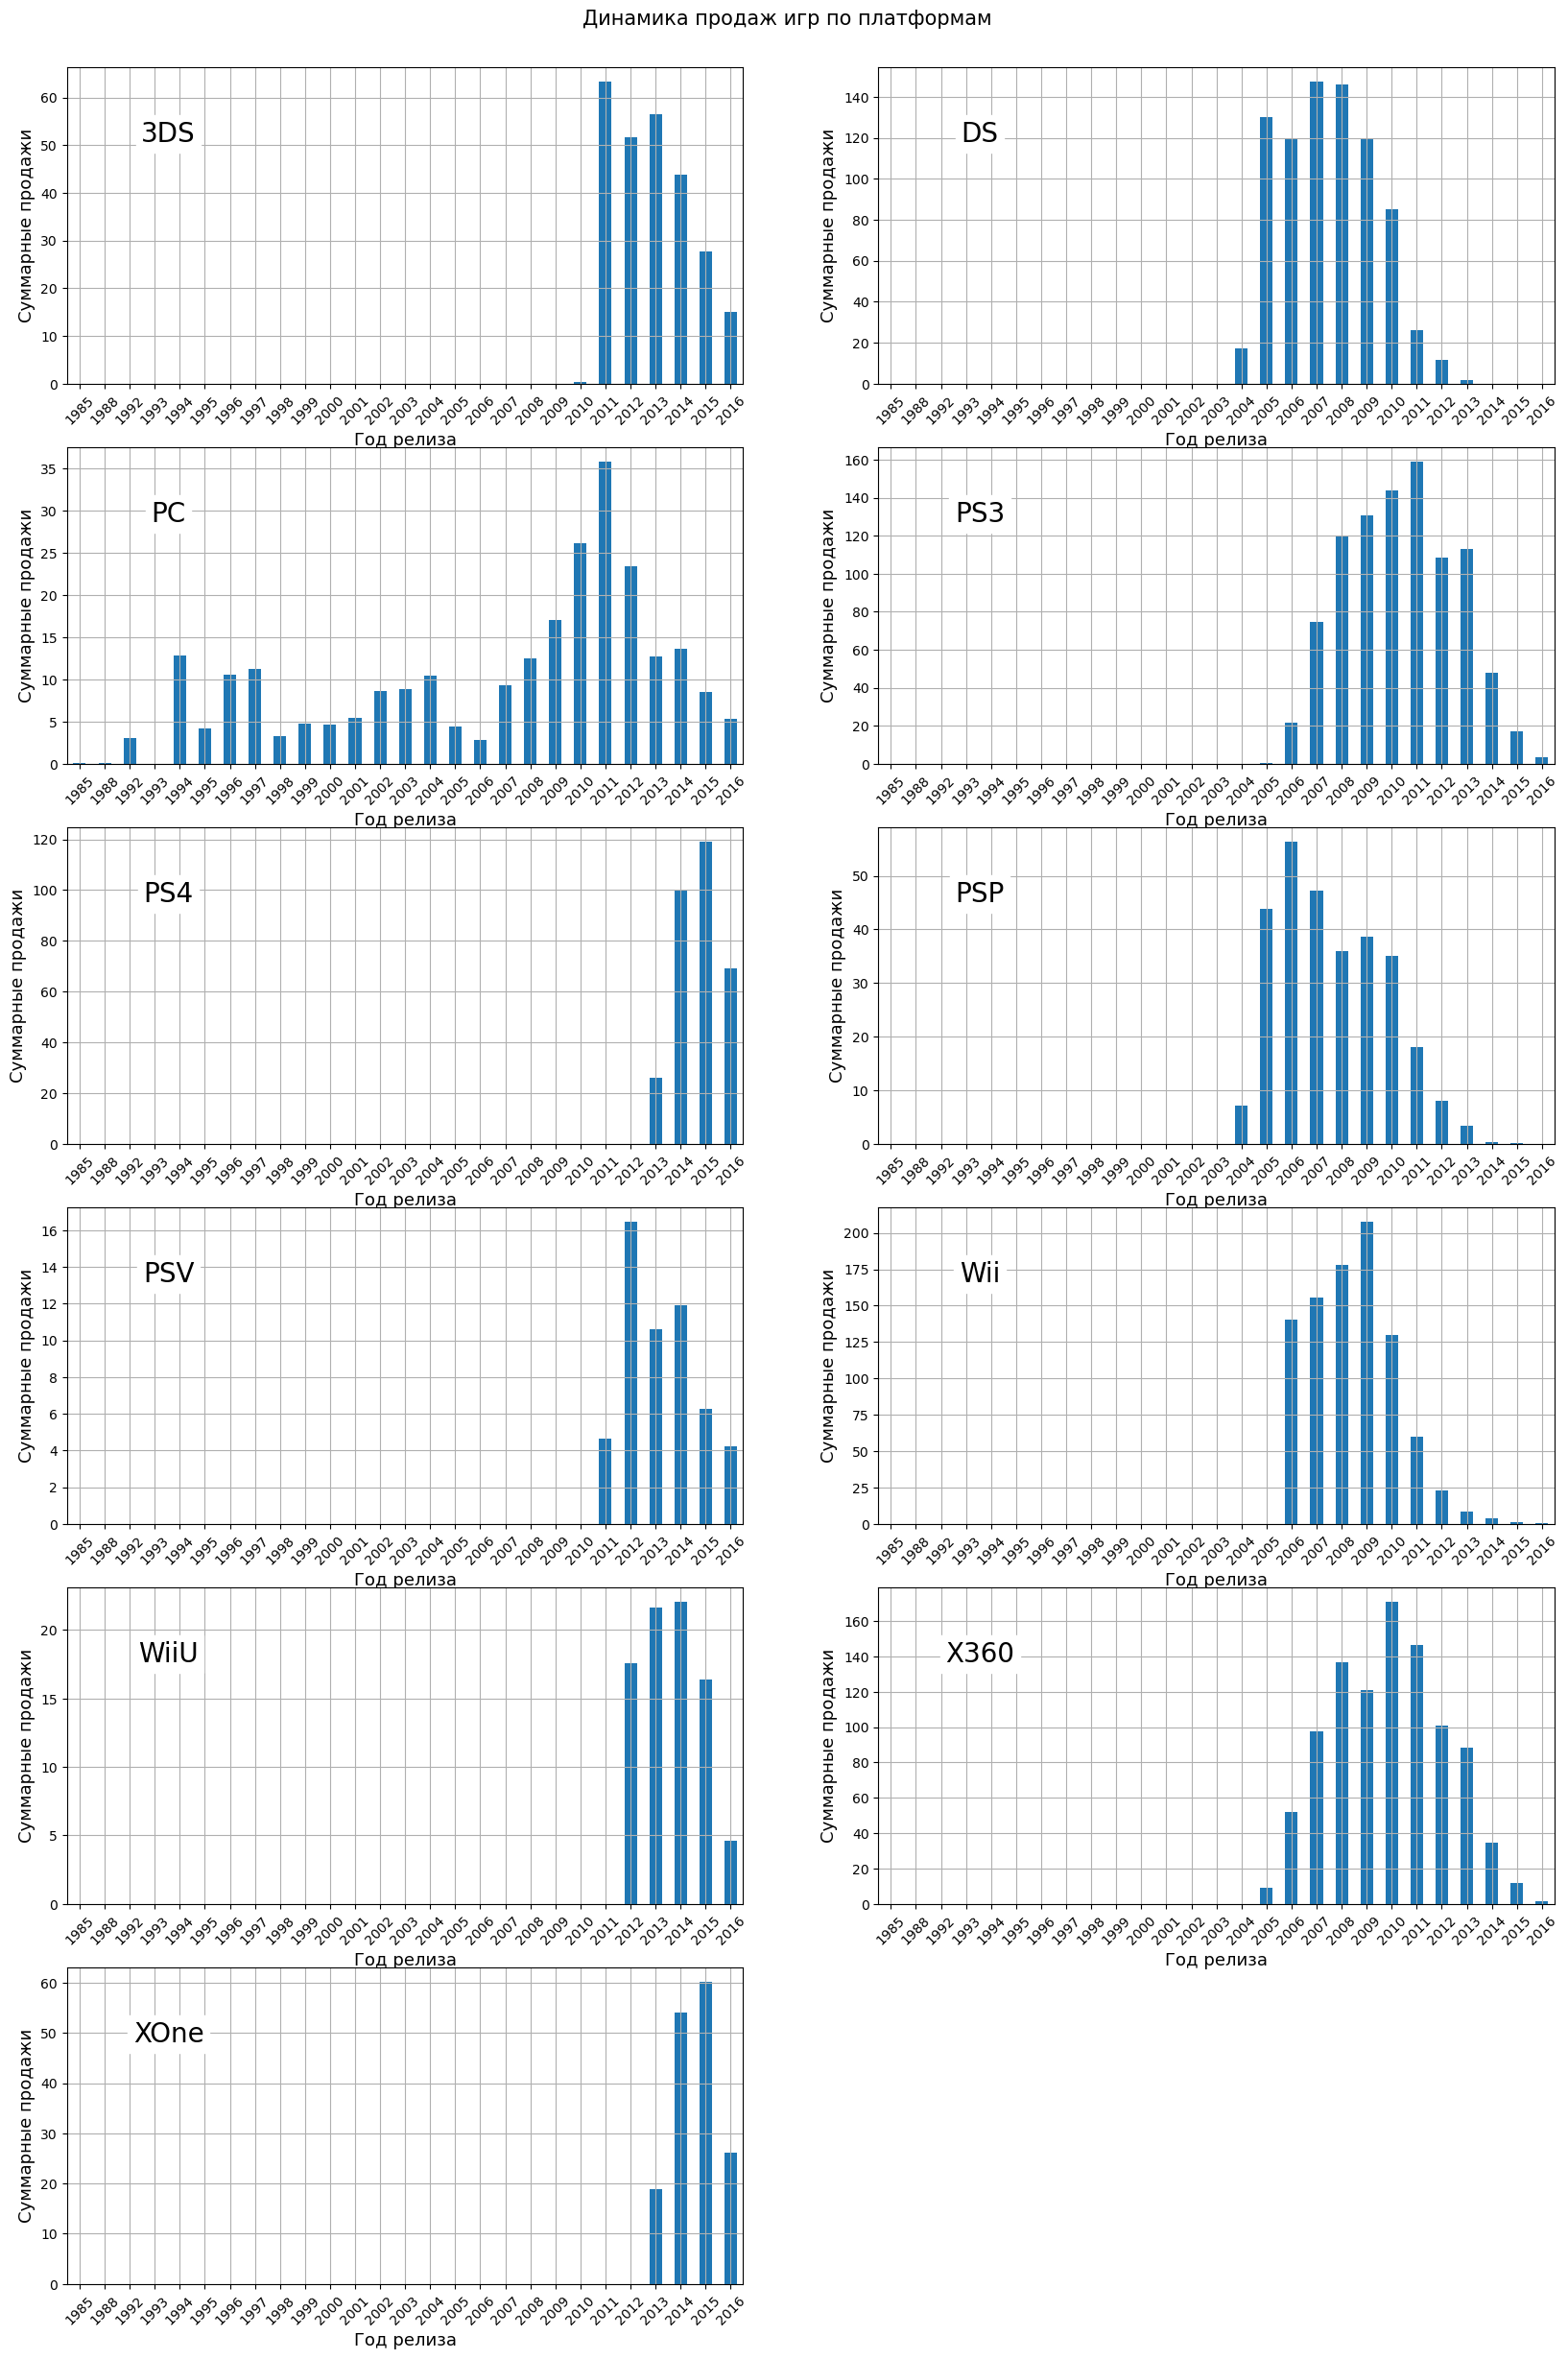

In [32]:
target_platform = data.query('platform in @clean_data_sales.index') \
                  .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
target_platform.reset_index(inplace=True)

fig = plt.figure(figsize=(20, 30))

i=1
for column in target_platform.columns:
    if column=='year_of_release':
        continue
    else:
        target_platform.plot(x='year_of_release', y=column, kind='bar',
        grid=True, legend=False, rot=45, alpha=1, ax=plt.subplot(6,2,i))
        plt.title(column, loc ='center', pad = 15, fontsize=20, \
             color='black', backgroundcolor='white', fontstyle='normal', y=0.7, x=0.15)
        plt.xlabel('Год релиза', fontsize=13, color='black')
        plt.ylabel('Суммарные продажи', fontsize=13, color='black')
        i+=1
        
fig.suptitle('Динамика продаж игр по платформам', y=0.9, fontsize = 15)
plt.show()

Динамика продаж показывает:    
- PS4, XOne, 3DS показывают стабильно высокие продажи    
- PSV, WiiU, PC показывают стабильно средние продажи
- PS3, X360 выходят из моды, могут показать средний уровень продаж, но общая динамика идёт на спад    
- Wii, PSP, DS показывают низкий уровень продаж, утратили актуальность

Таким образом, потенциально прибыльными платформами в 2017 году могут быть: **PS4, XOne, 3DS, PSV, WiiU, PC**

#### Продажи игр по платформам <a id='m_platform_best_sales_box'></a>

Чтобы составить картину голобальных продаж по платформам, построим диаграмму размаха

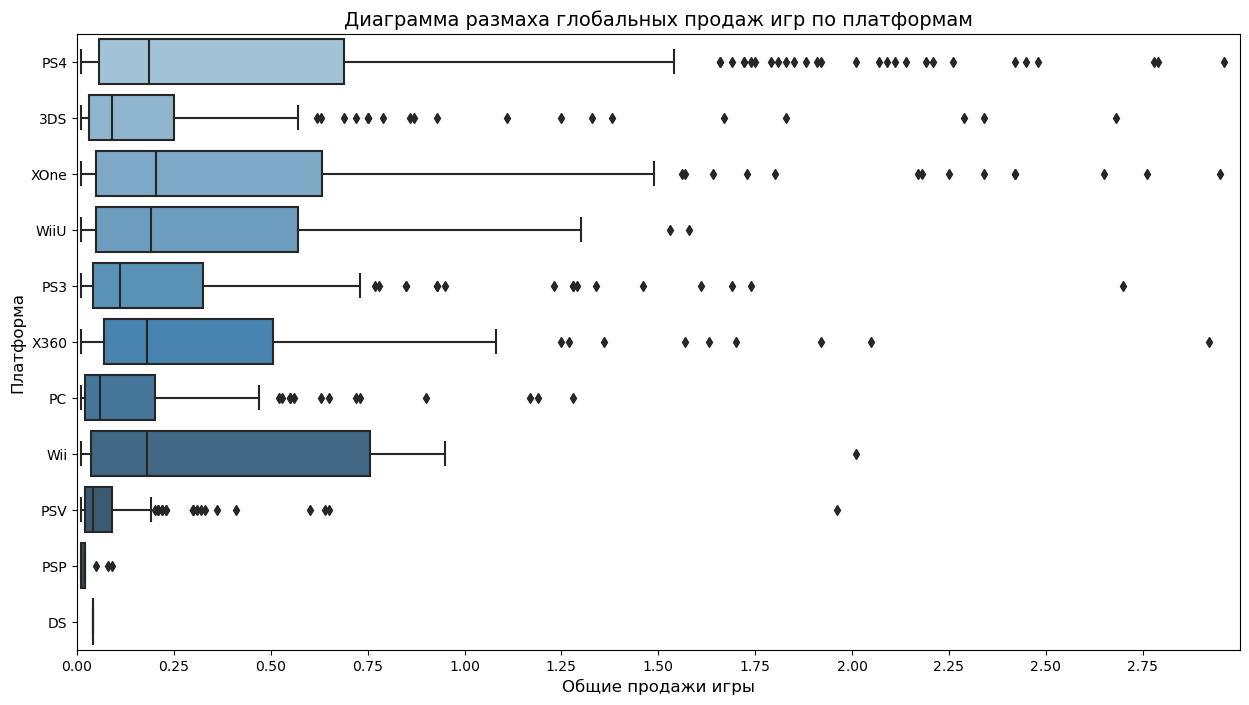

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(data=clean_data.sort_values(by='total_sales', ascending=False), x='total_sales', y='platform', palette='Blues_d')
plt.title(label='Диаграмма размаха глобальных продаж игр по платформам', fontsize=14)
plt.xlabel('Общие продажи игры', fontsize=12)
plt.ylabel('Платформа', fontsize=12)
plt.xlim(0, 3)
plt.xticks(np.arange(0, 3, 0.25))
plt.show()

Медианное количество проданных копий игры для перспективных платформ не превышает 250 тысяч. Продажа более 750 тысяч копий может считаться большим успехом. Продажи более полутора миллионов копий игры являются аномально высокими и представлены единичными случаями

#### Зависимость количества проданных игр от отзывов    <a id='m_corr_sales_feedback'></a>
Разберёмся, что же влияет на уровень продаж, сначала посмотрим, есть ли зависимость количества проданных игр от отзывов пользователей и критиков для платформы PS4, показавшей самое большое количество продаж среди перспективных платформ

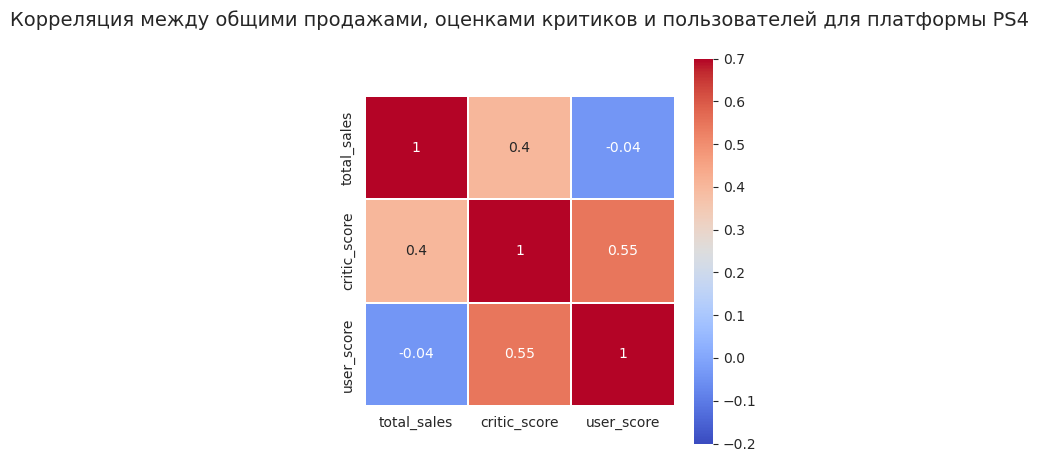

In [34]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5, 5))
    plt.title('Корреляция между общими продажами, оценками критиков и пользователей для платформы PS4', 
              y=1.2, fontsize = 14, wrap=True)
    ax = sns.heatmap(clean_data[clean_data['platform'] == 'PS4'][['total_sales', 'critic_score', 'user_score']]       
                     .corr(), cbar = True, vmax=.7, vmin=-.2, square=True, annot=True, linewidths=.3, cmap='coolwarm')

Для платформы PS4 характерны следующие взаисмосвязи продаж и оценок:    
- Умеренная сила связи между оценками критиков и общими продажами (коэффициент Пирсона 0.4)
- Отсутствие линейной связи между оценками пользователей и общими продажами (коэффициент Пирсона -0.04)
- Заметная связь между оценками пользователей и критиков (коэффициент Пирсона 0.55)    

Проверим, является ли такое распределение связей общим для перспективных платформ

In [35]:
def sample_maker(desired_platform):
    return clean_data[clean_data['platform'] == desired_platform]['total_sales'], \
           clean_data[clean_data['platform'] == desired_platform]['critic_score'], \
           clean_data[clean_data['platform'] == desired_platform]['user_score']

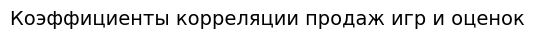

,platform,critic_correlation,user_correlation
1,XOne,0.429,-0.070
0,PS4,0.403,-0.040
4,WiiU,0.370,0.408
3,3DS,0.314,0.215
5,PC,0.176,-0.065
2,PSV,0.043,-0.168


In [36]:
important_platforms = ['PS4', 'XOne', 'PSV', '3DS', 'WiiU', 'PC']
critic_corr = []
user_corr = []

for elem in important_platforms:
    y_sales, x_critic, x_user = sample_maker(elem)
    
    critic_corr.append(y_sales.corr(x_critic).round(3))
    user_corr.append(y_sales.corr(x_user).round(3))
    
fig = plt.figure(figsize=(0, 0))
plt.title('Коэффициенты корреляции продаж игр и оценок', y=0, fontsize = 14)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.show()

corr_data = pd.DataFrame({'platform': important_platforms, 'critic_correlation': critic_corr,
                          'user_correlation': user_corr})
corr_data.sort_values(by='critic_correlation', ascending=False) \
         .style.background_gradient(cmap='coolwarm', axis=0).set_precision(3)

Коэффициенты корреляции показывают, что чаще всего зависимость продаж от оценок критиков сильнее, чем от оценок пользователей. За исключением платформы WiiU, показывающей умеренную корреляцию оценок пользователей и суммарных продаж. Показатели платформы PS4 не являются исключением, они характерны и для других платформ, но линейная корреляция умеренная, или слабая, возможно это следствие того, что характер зависимости не является линейным, и коэффициент Пирсона не может его отследить, чтобы проверить это, построим графики разброса значений продаж и оценок

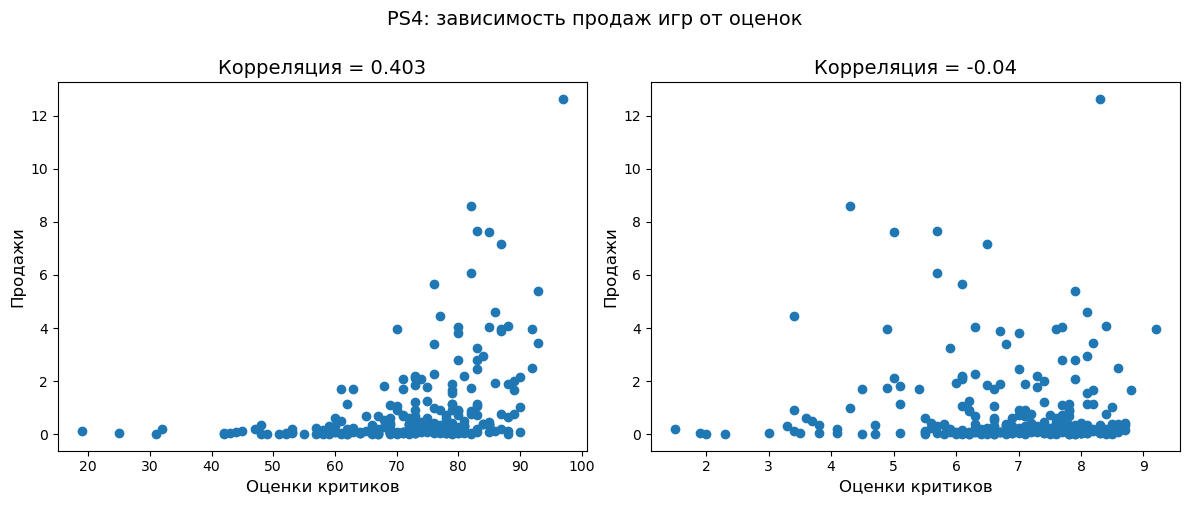

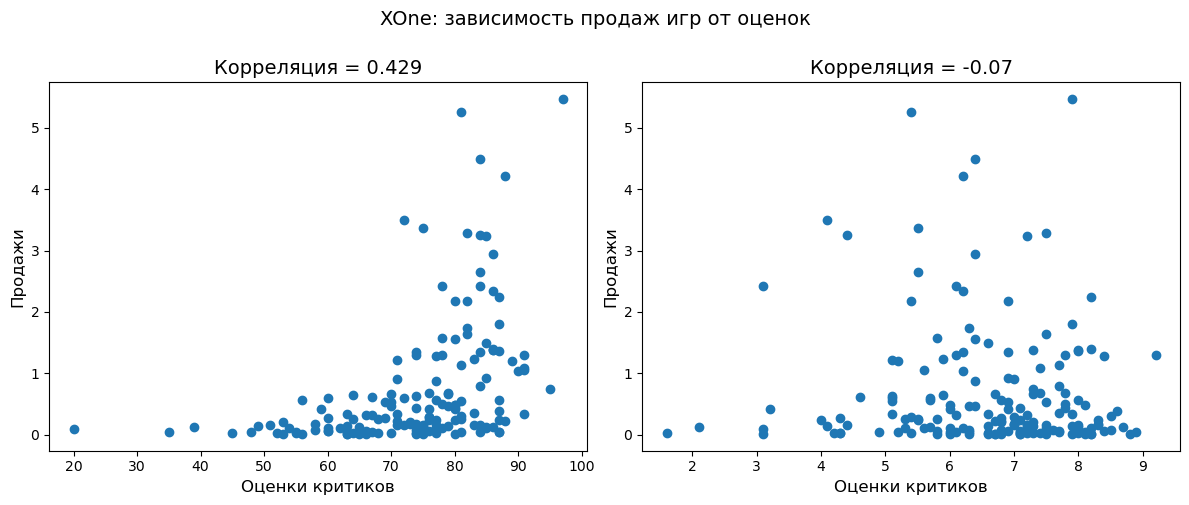

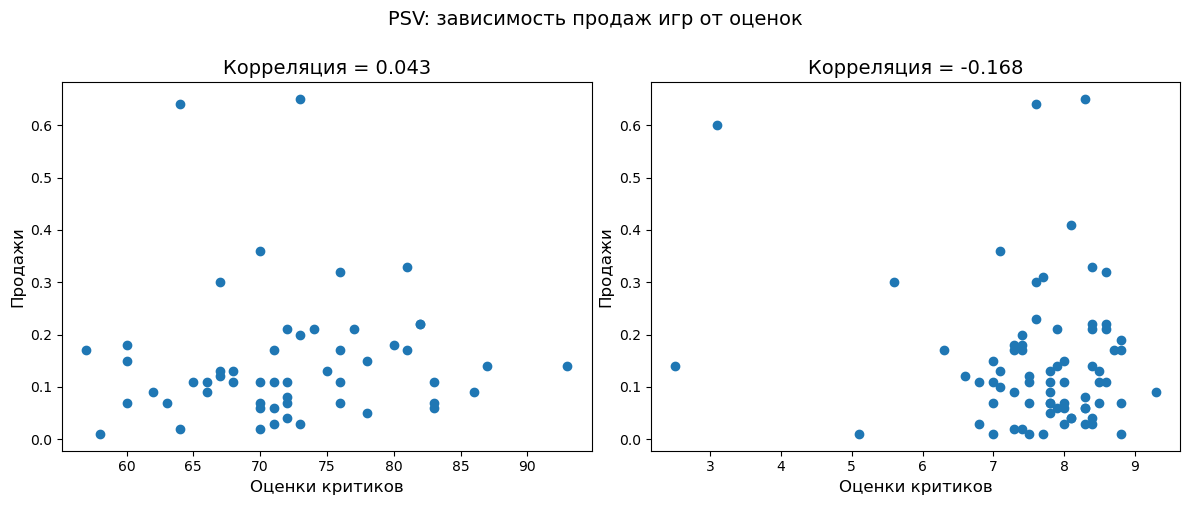

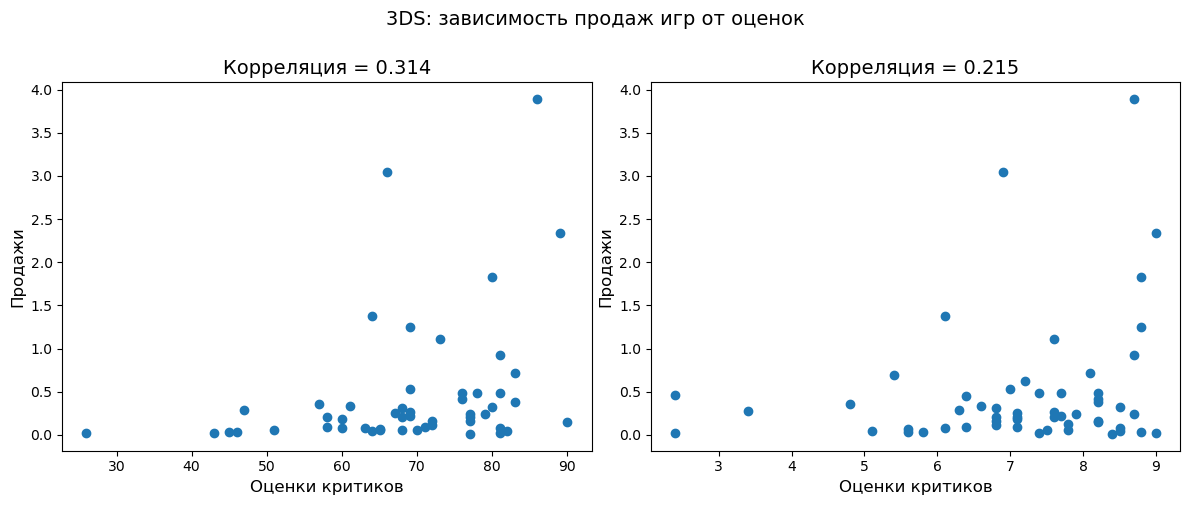

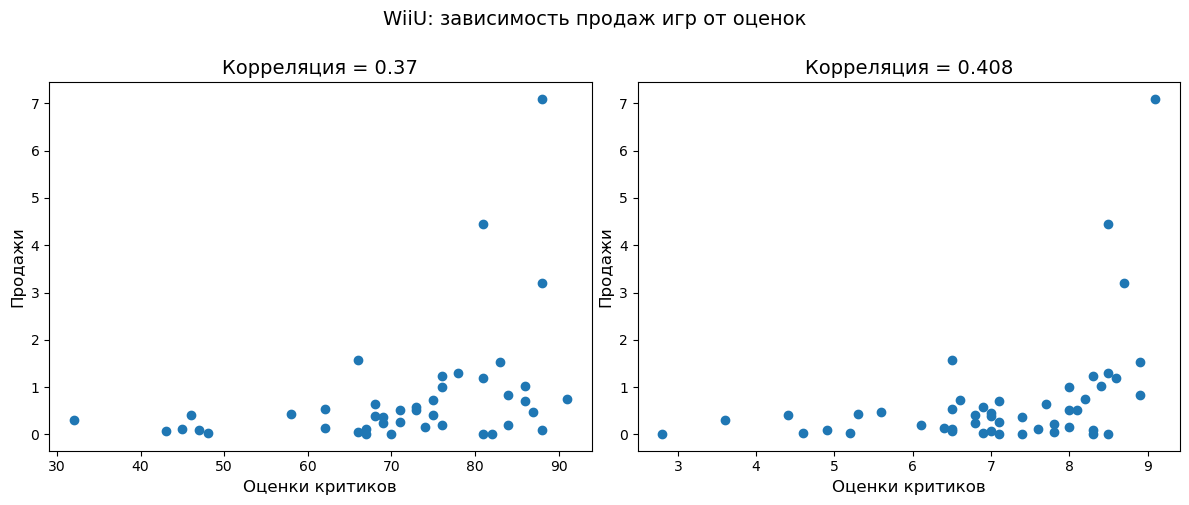

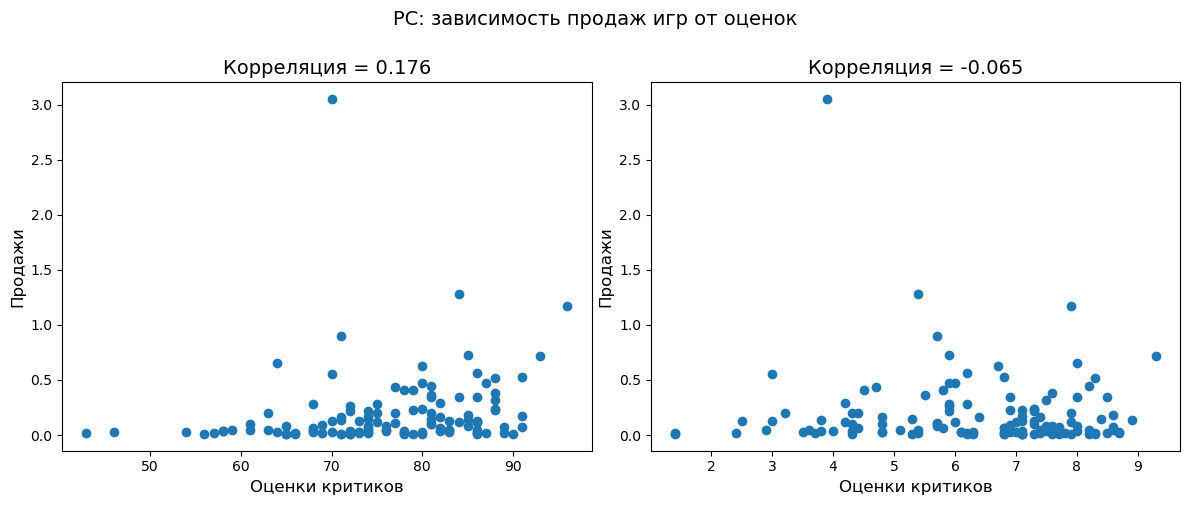

In [37]:
for elem in important_platforms:
    y_sales, x_critic, x_user = sample_maker(elem)
    
    fig = plt.figure(figsize=(12, 5))
    fig.suptitle(elem + ': зависимость продаж игр от оценок', y=1, fontsize = 14)
    target = [[x_critic, x_user], ['critic_correlation', 'user_correlation']]
    
    for drawing in range(2):
        ax1 = fig.add_subplot(1,2,(drawing+1))
            
        ax1.scatter(target[0][drawing], y_sales)
        ax1.set_title('Корреляция = ' + str((corr_data.loc[corr_data['platform'] == elem][target[1][drawing]]
                                             .tolist())[0]), fontsize=14)
        ax1.set_xlabel('Оценки критиков', fontsize=12)
        ax1.set_ylabel('Продажи', fontsize=12)
    
    plt.tight_layout(w_pad=0.5)

Графики показывают более сложный характер зависимости, чем линейная. Сначала с ростом оценок критиков и пользователей продажи не растут до определённого порога, характерного для каждой платформы, после чего начинается рост, близкий к экспоненциальному. Вместе с тем прослеживается возможность влияния сторониих факторов: часто при высоких оценках игры, её продажи минимальны - это может быть следствием непопулярности жанра игры, высокой стоимости игры, установленной разработчиком, региональными предпочтениями, особенностями тематики игры, или высоким возрастным рейтингом.    
Попробуем отследить эти факторы, начав с влияния жанра игры на продажи

#### Зависимость продаж игр от жанра <a id='m_corr_sales_genre'></a>

Сначала посмотрим на общее распределение игр по жанрам

In [38]:
sales_by_genre = clean_data.pivot_table(index='genre', aggfunc={'total_sales':sum, 'genre':'count'})
sales_by_genre['mean_sales'] = (sales_by_genre['total_sales'] / sales_by_genre['genre']).round(2)
sales_by_genre.rename(columns={'genre': 'games_count'}, inplace=True)
sales_by_genre = sales_by_genre.sort_values('games_count', ascending=False)
sales_by_genre.style.background_gradient(cmap='coolwarm', axis=0).set_precision(2)

,games_count,total_sales,mean_sales
genre,,,
Action,621,199.75,0.32
Role-Playing,221,101.44,0.46
Adventure,185,17.55,0.09
Sports,161,109.48,0.68
Shooter,128,170.94,1.34
Misc,113,37.55,0.33
Racing,69,27.52,0.40
Fighting,60,28.22,0.47
Simulation,44,13.13,0.30


Лидером по количеству выпущенных игр является жанр Action, за ним с большим отставанием следуют жанры Role-Playing, Adventure, Sports, Shooter. Распределение по общим продажам в целом соответствует количеству выпущенных игр, за исключение жанра Adventure, который при большом количестве выпущенных игр показал довольно низкие общие продажи, с этим жанром нужно быть осторожнее, чтобы избежать убытков. Жанр Shooter, напротив, при среднем среди жанров количестве выпущенных игр показал довольно высокие общие продажи, он может быть интересен в плане получения прибыли.    
Посмотрим на распределения по жанрам подробннее и проверим, подтвердят ли средние значения продаж наши предположения 

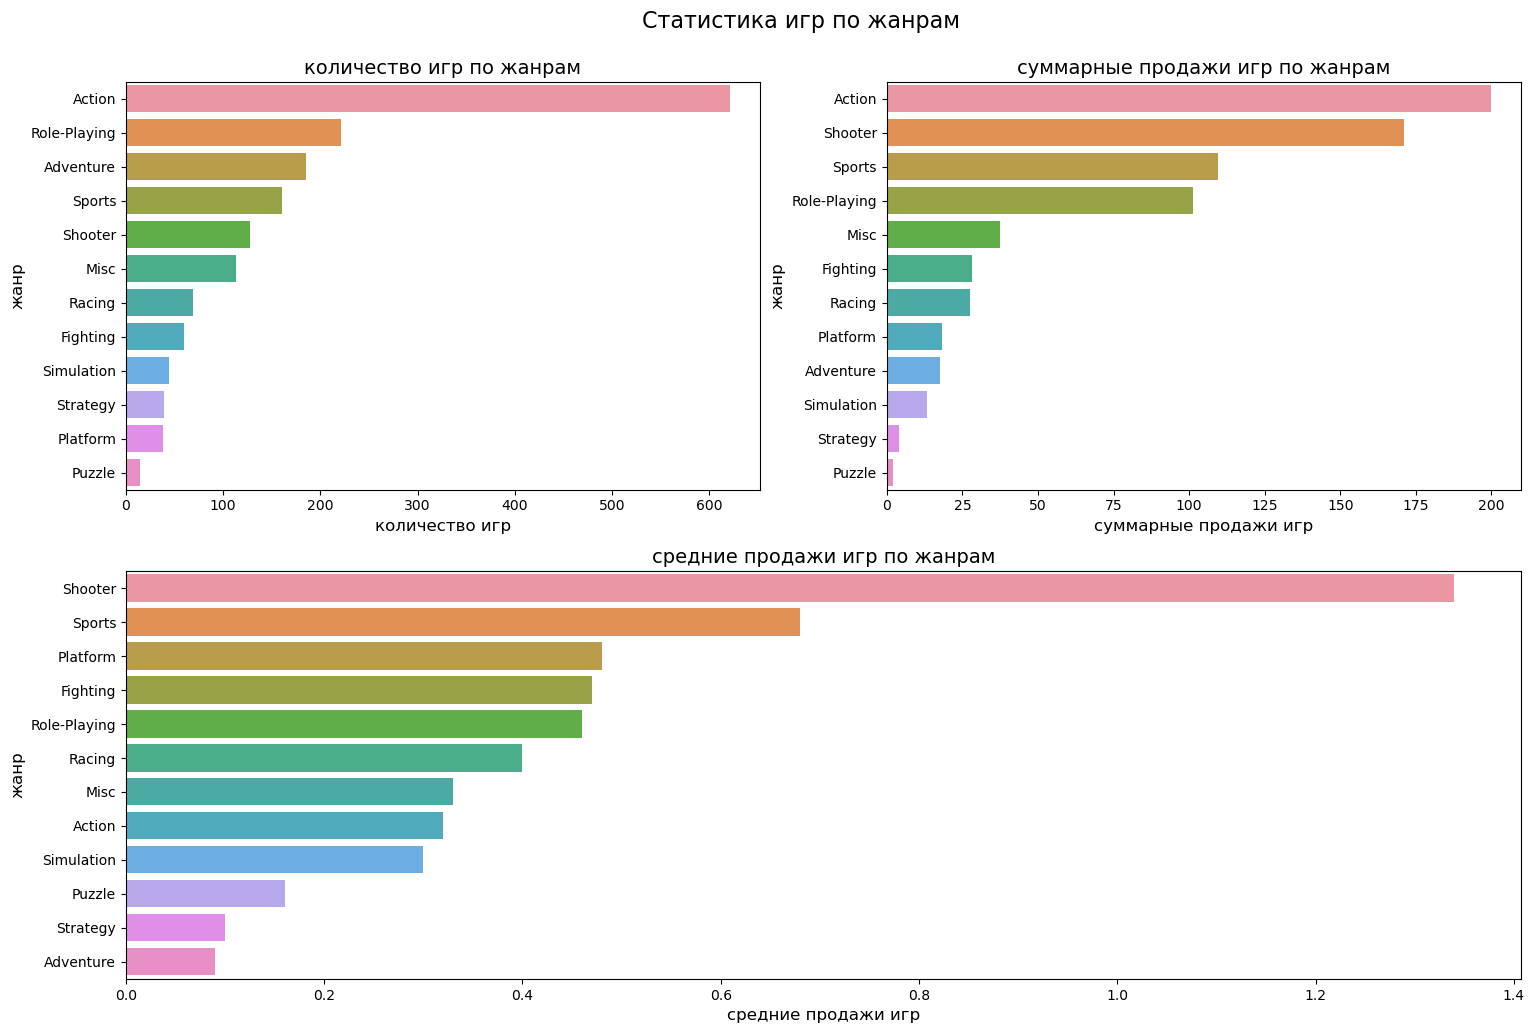

In [39]:
col_dict = {'games_count' : 'количество игр', 'total_sales' : 'суммарные продажи игр', 'mean_sales' : 'средние продажи игр'}
fig = plt.figure(figsize=(18, 18))
fig.suptitle('Статистика игр по жанрам', y=0.92, fontsize = 16)
i = 1
for key in col_dict:
    if i > 2:
        pos = (3,4)
    else:
        pos = i
    sales_by_genre = sales_by_genre.sort_values(by=key, ascending=False)
    ax1 = sns.barplot(data=sales_by_genre, x=key, y=sales_by_genre.index, ax=plt.subplot(3,2,pos))
    ax1.set_title(col_dict.get(key) + ' по жанрам', fontsize=14)
    ax1.set_xlabel(col_dict.get(key), fontsize=12)
    ax1.set_ylabel('жанр', fontsize=12)
    i +=1
plt.show()

Действительно жанр Adventure, находясь в тройке лидеров по количеству выпущенных игр, оказался на последнем месте по средниму количеству проданных копий, также невысокие результаты показали жанры Strategy и Puzzle, не преодолев планку в 200000 проданных копий, что меньше медианных значений продаж игр по платформам, на игры этих жанров не рекомендуется делать ставку. Являясь средними по количеству выпущенных игр, показали средний уровень продаж (от 300000 до 400000) жанры Misc, Racing,  Simulation; Жанр Action также показал средние продажи, но по количеству выпущенных игр он является лидером - есть из чего выбрать. Лидерами по средним продажам стали жанры Role-Playing, Sports, Platform, Fighting и Shooter. Жанр Shooter показал среднее количество проданных копий более миллиона(!) это важно учесть при планировании продаж.

#### Вывод: <a id='conclusion3'></a>

График количества выпускаемых игр по годам показал, что формирование рынка проходило в несколько этапов:
- Период стабильности с 1980 по 1992.
- Период плавного роста с 1993 по 2000.
- Резкий рост с 2001 по 2009.
- Резкое падение с 2010 по 2012.
- Стабилизация с 2012 года.    

Исходя из задачи прогнозирования продаж на 2017 год, нам важно отследить тренды, оказывающие влияние на текущий период, и исключить влияние на прогноз факторов, которые прекратили своё воздействие, поэтому в исследовании наиболее значимыми будут данные последнего периода стабилизации с 2012 года. За этот период было выпущено 2908 игр, в среднем в год выпускалась 581 игра. 

В топ-10 платформ с наибольшими суммарными продажами попали производители из разных стран, лидирует PS2, но и X360 не сильно отстаёт, в тройку лидеров попала и PS3. Замыкакет топ-10 по количеству продаж платформа PC.    
Обычно платформы существуют около 11 лет, но как правило, пик популярности проходится на середину их жизни, после чего идёт период постепенного снижения уровня продаж, сопровождаемый (а возможно и обусловленный) выходами новых платформ, которые появляются примерно раз в 4 года, поэтому часть платформ с высокими продажами утратили свою актуальность:     
среди топ-10 платформ по объёму продаж наиблее востребованной на данный момент является PS4. Стабильные, но невысокие показатели продаж показывает непотопляемая платформа PC, платформы X360 и PS3 на закате популярности. Остальные платформы из топа продаж утратили актуальность.

Учитывая данные о продажах и динамике развития платформ, для разработки стратегии на 2017 год, чтобы отследить актуальные тренды и исключить влияние на прогноз факторов, прекративших своё воздействие, оставили в исследовании только данные после 2013 года.
За актуальный период выпущено 1693 игр в продажах участвовали 11 платформ, среди которых были как известные нам по общему топ-10 платформы, так и новички: XOne, 3DS, PSV, WiiU. Лидер рейтинга актуалных платформ по продажам - PS4, заметно отстаёт XOne, замыкает тройку лидеров 3DS. Медианное количество проданных копий игры для перспективных платформ не превышает 250 тысяч, продажа более 750 тысяч копий может считаться большим успехом, продажи более полутора миллионов копий игры являются аномально высокими и представляются единичными случаями.    
Динамика продаж:    
- PS4, XOne, 3DS показывают стабильно высокие продажи    
- PSV, WiiU, PC показывают стабильно средние продажи
- PS3, X360 выходят из моды, могут показать средний уровень продаж, но общая динамика идёт на спад    
- Wii, PSP, DS показывают низкий уровень продаж, утратили актуальность    

Таким образом, потенциально прибыльными платформами в 2017 году могут быть: **PS4, XOne, 3DS, PSV, WiiU, PC**

Зависимость количества проданных игр от отзывов пользователей и критиков: 

Для платформы PS4, показавшей самое большое количество продаж среди перспективных платформ, характерны следующие взаисмосвязи продаж и оценок:
- Умеренная сила связи между оценками критиков и общими продажами (коэффициент Пирсона 0.4)
- Отсутствие линейной связи между оценками пользователей и общими продажами (коэффициент Пирсона -0.04)
- Заметная связь между оценками пользователей и критиков (коэффициент Пирсона 0.55)

Для актуальных платформ в целом коэффициенты корреляции показывают, что чаще всего зависимость продаж от оценок критиков сильнее, чем от оценок пользователей. За исключением платформы WiiU, показывающей умеренную корреляцию оценок пользователей и суммарных продаж. Показатели платформы PS4 не являются исключением, они характерны и для других платформ, но линейная корреляция умеренная, или слабая, возможно это следствие того, что характер зависимости не является линейным, и коэффициент Пирсона не может его отследить. Для проверки этого утверждения построили графики разброса значений продаж и оценок, которые подтвердили более сложный характер зависимости, чем линейная: сначала, с ростом оценок критиков и пользователей продажи не растут до определённого порога, характерного для каждой платформы, после чего начинается рост, близкий к экспоненциальному. Вместе с тем прослеживается возможность влияния сторониих факторов: часто при высоких оценках игры, её продажи минимальны - это может быть следствием непопулярности жанра игры, высокой стоимостью игры, установленной разработчиком, особенностями тематики игры, или высоким возрастным рейтингом.    
Чтобы отследить эти факторы, сначала посмотрели на общее распределение игр по жанрам, которое показало, что лидером по количеству выпущенных игр является жанр Action, за ним с большим отставанием следуют жанры Role-Playing, Adventure, Sports, Shooter. Распределение по общим продажам в целом соответствует количеству выпущенных игр, за исключение жанра Adventure, который при большом количестве выпущенных игр показал довольно низкие общие продажи, с этим жанром нужно быть осторожнее, чтобы избежать убытков. Жанр Shooter, напротив, при среднем среди жанров количестве выпущенных игр показал довольно высокие общие продажи, он может быть интересен в плане получения прибыли.    
Анализ средних значений продаж по жанрам показал, что жанр Adventure, находясь в тройке лидеров по количеству выпущенных игр, оказался на последнем месте по средниму количеству проданных копий, также невысокие результаты показали жанры Strategy и Puzzle, не преодолев планку в 200000 проданных копий, что меньше медианных значений продаж игр по платформам, на игры этих жанров не рекомендуется делать ставку. Являясь средними по количеству выпущенных игр, показали средний уровень продаж (от 300000 до 400000) жанры Misc, Racing, Simulation; Жанр Action также показал средние продажи, но по количеству выпущенных игр он является лидером - есть из чего выбрать. Лидерами по средним продажам стали жанры Role-Playing, Sports, Platform, Fighting и Shooter. Жанр Shooter показал среднее количество проданных копий более миллиона, что важно учитывать при планировании продаж.

### Портрет пользователя <a id='user_research'></a>

Чтобы выявить влияние на продажи игр возрастного рейтинга и региональных особенностей, составим портрет пользователя.   
Зададим функцию, которая выводит таблицу и график по интересующей категории в разбивке по регионам

In [40]:
def portrait_maker(category, g_title): # Получаем столбец и заголовок графика
    # Задаём списки регионов и категорий для графиков
    region_dict = {'na_sales' : 'Северная Америка', 'eu_sales' : 'Европа', 'jp_sales' : 'Япония'}
    category_dict= {'platform' : 'платформа', 'genre' : 'жанр', 'rating' : 'возрастной рейтинг'}
    
    # Сводим данные по заданной категории и выводим таблицу
    data_by_category = clean_data.pivot_table(index=category, aggfunc={'eu_sales':sum, 'na_sales':sum, 'jp_sales':sum})
    display(data_by_category.sort_values(by='eu_sales', ascending=False)
                            .style.background_gradient(cmap='coolwarm', axis=0).set_precision(2))
    
    # Рисуем графики по категориям по регионам
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(g_title, y=1, fontsize = 16)
    i = 1
    for key in region_dict:
        # Формируем рейтинги по регионам
        region_sales = data_by_category.nlargest(5, columns=key)

        ax1 = sns.barplot(data=region_sales, y=key, x=region_sales.index, ax=plt.subplot(1,3,i))
        ax1.set_title(region_dict.get(key), fontsize=14)
        ax1.set_xlabel(category_dict.get(category), fontsize=12)
        ax1.set_ylabel('продажи', fontsize=12)
        i += 1

#### Самые популярные платформы (топ-5)    <a id='u_platform'></a>
Сначала посмотрим различия в продажах по платформам в регионах

,eu_sales,jp_sales,na_sales
platform,,,
PS4,130.04,15.02,98.61
XOne,46.25,0.32,81.27
PS3,25.54,11.22,22.05
PC,18.27,0.00,7.29
3DS,16.12,44.24,22.64
X360,15.49,0.08,28.30
WiiU,13.15,7.31,19.36
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08


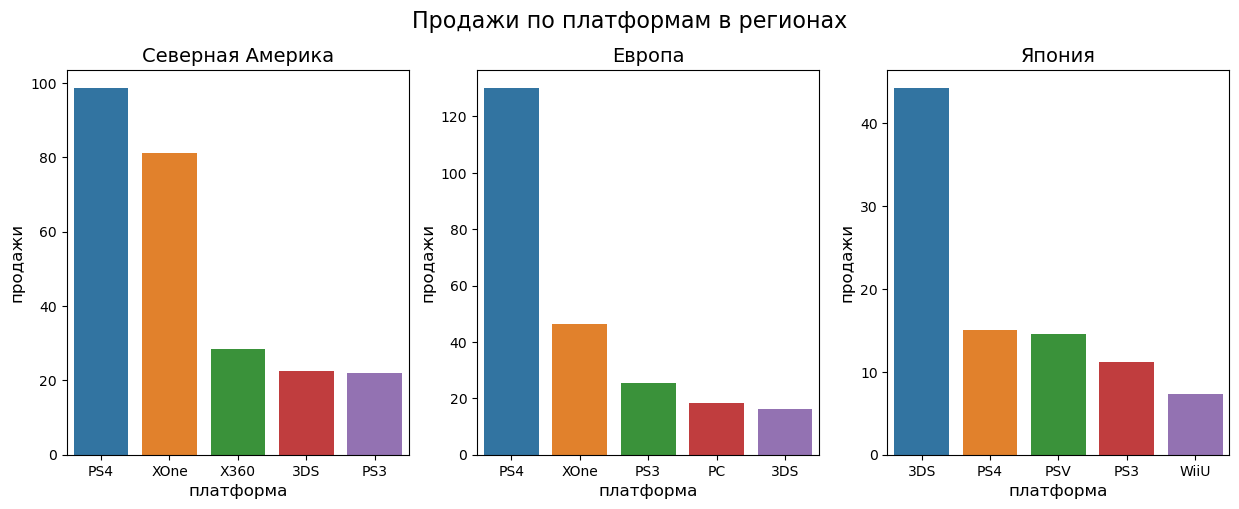

In [41]:
portrait_maker('platform', # Выбираем столбец для получения по нему портрета
               'Продажи по платформам в регионах') # Задаём заголовок графика
plt.show()

Продажи по платформам в регионах показали следующие тенденции:    
- Японскому рынку свойственно использование только отечественных платформ PS4, PSV, PS3, WiiU и лидер рынка - 3DS.   
- Американцы тоже часто пользуются местными платформами: XOne и X360, но лидер рынка - японская платформа PS4. Платформы 3DS и PS3 также занимают значительную долю продаж.
- Европейцы предпочитают платформы PS4 (лидер рынка) и американкую платформу XOne (значительное отставание от лидера). Также популярными являются платформы PS3, PC и 3DS.

#### Самые популярные жанры (топ-5) <a id='u_genre'></a>
Далее, посмотрим какие жанры предпочитают пользователи в разных регионах 

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.93,29.62,72.59
Shooter,65.52,4.87,79.02
Sports,45.73,3.26,46.13
Role-Playing,28.17,31.16,33.47
Racing,14.13,1.76,8.74
Misc,12.86,5.61,15.05
Simulation,7.30,2.31,2.63
Platform,6.80,2.69,6.79
Fighting,6.69,6.37,12.43


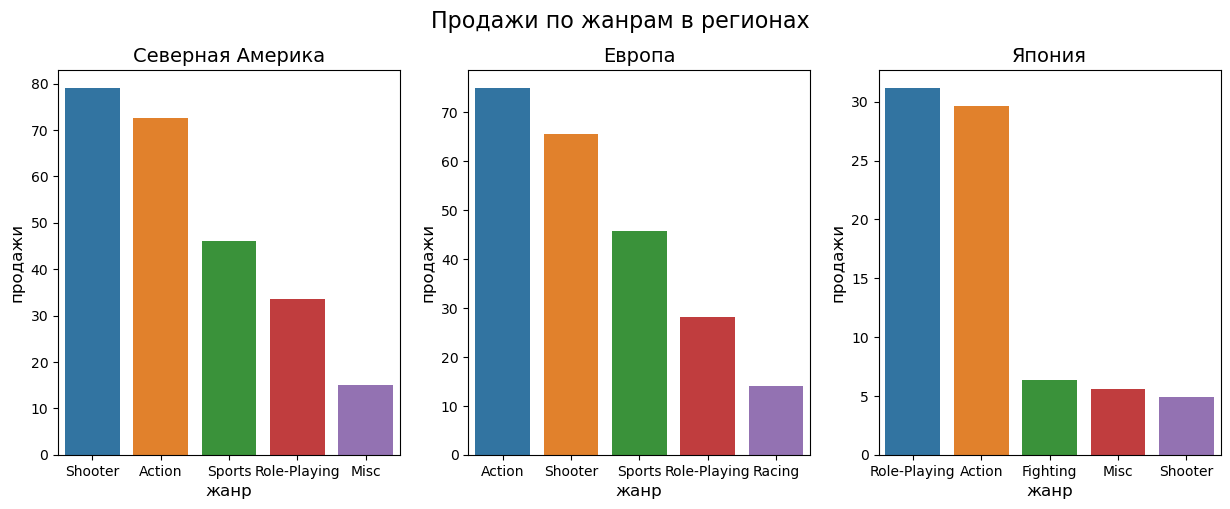

In [42]:
portrait_maker('genre', # Выбираем столбец для получения по нему портрета
               'Продажи по жанрам в регионах') # Задаём заголовок графика
plt.show()

В Европе и Северной Америке схожие предпочтения по жанрам - сказывается влияние единого культурного пространства. Наиболее популярны жанры Action (лидер продаж в Европе), Shooter (лидер продаж в Америке), Sports, Role-Playing, замыкает топ-5 в Америке жанр Misc, а у европейцев топ завершает жанр Racing.     
Японцы опять отличились: лидер продаж - жанр Role-Playing, на втором месте - Action, остальные жанры (Misc, Shooter, Fighting) показали довольно низкие относительно лидеров продажи - менее 10 миллионов копий

#### Влияние рейтинга ESRB  <a id='u_esrb'></a>
Теперь проверим как влияет рейтинг ESRB на продажи в отдельном регионе

,eu_sales,jp_sales,na_sales
rating,,,
M,93.69,8.01,96.48
unknown,58.99,56.94,64.72
E,58.06,8.94,50.74
T,34.07,14.78,38.95
E10+,26.17,4.46,33.23


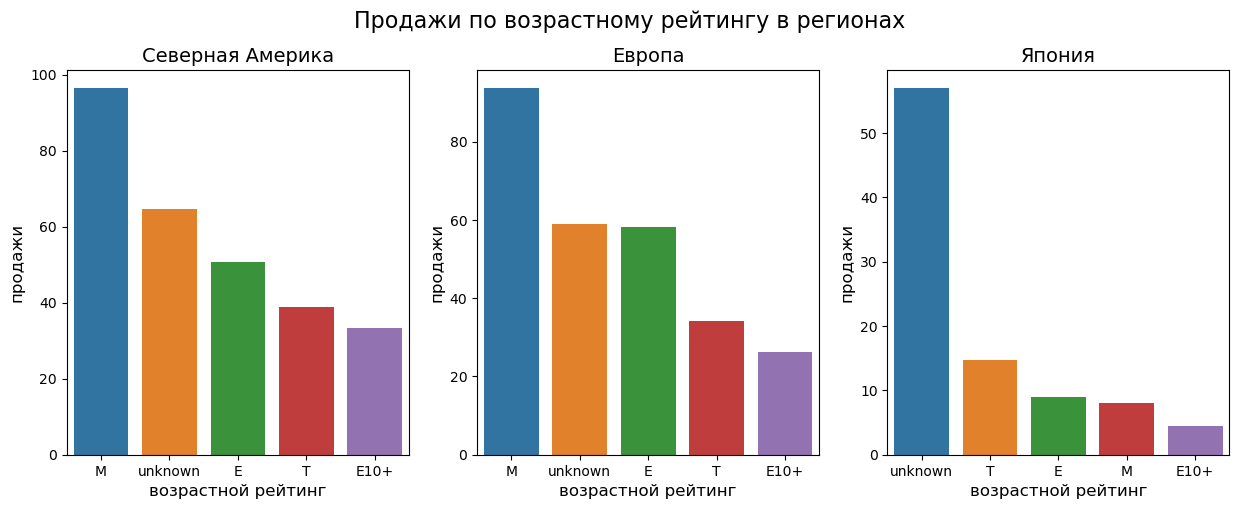

In [43]:
portrait_maker('rating', # Выбираем столбец для получения по нему портрета
               'Продажи по возрастному рейтингу в регионах') # Задаём заголовок графика
plt.show()

В Европе и Америке снова одинаковые предпочтения: наиболее популярен ретинг "M", на втором месте с бошльшим отставанием рейтинг "E". Рейтинги  "T" и "E10+" также вошли в топ-5 по продажам.    
В Японии ретинг "T" уже на первом месте по популярности, немного отстают рейтинги "E" и "M", а замыкает топ-5 рейтинг "E10+"

#### Выводы: <a id='conclusion4'></a>

Продажи по платформам в регионах показали следующие тенденции: японские пользователи отдают предпочтение только отечественным платформам PS4, PSV, PS3, WiiU и лидеру рынка - 3DS. Американские пользователи тоже часто пользуются местными платформами: XOne и X360, но лидер рынка - японская платформа PS4. Платформы 3DS и PS3 также занимают значительную долю продаж. Европейцы предпочитают платформы PS4 (лидер рынка) и американкую платформу XOne (значительное отставание от лидера). Также популярными являются платформы PS3, PC и 3DS.    

Предпочтения по жанрам в Европе и Северной Америке схожие  - сказывается влияние единого культурного пространства. Наиболее популярны жанры Action (лидер продаж в Европе), Shooter (лидер продаж в Америке), Sports, Role-Playing, замыкает топ-5 в Америке жанр Misc, а у европейцев топ завершает жанр Racing.     
Японцы опять отличились: лидер продаж - жанр Role-Playing, на втором месте - Action, остальные жанры (Misc, Shooter, Fighting) показали низкие относительно лидеров продажи - менее 10 миллионов копий.

По рейтингу ESRB в Европе и Америке снова одинаковые предпочтения: наиболее популярен ретинг "M", на втором месте с бошльшим отставанием рейтинг "E". Рейтинги "T" и "E10+" также вошли в топ-5 по продажам. В Японии ретинг "T" уже на первом месте по популярности, немного отстают рейтинги "E" и "M", а замыкает топ-5 рейтинг "E10+"

### Проверка гипотез <a id='hypothesis'></a> 

Чтобы определить предпочтения пользователей проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и гипотезу предполагающую, что средние пользовательские рейтинги жанров Action и Sports разные.    
Поскольку выдвинутые гипотезы относятся к классу гипотез о равенстве средних двух выборок, для их проверки применим метод scipy.stats.ttest_ind

#### Гипотеза о пользовательских рейтингах платформ  <a id='h_platform'></a>    
**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**    
Сформулируем нулевую и альтернативную гипотезы:    

- H0 - средние пользовательские рейтинги платформ Xbox One и PC равны.
- H1 - средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC.    

Для проверки гипотез зададим функцию, которая проверит различие дисперсий, после чего проверит гипотезы методом ttest_ind. Уровень значимости зададим в 5% чтобы избежать ложноположительных результатов 

In [44]:
def hypothesis_checker(field, first_target, second_target, alpha):
    # Распределение параметра первой группы
    first_group = clean_data[(clean_data[field] == first_target)&(clean_data['user_score'] >= 0)]['user_score']
    # Распределение параметра второй группы
    second_group = clean_data[(clean_data[field] == second_target)&(clean_data['user_score'] >= 0)]['user_score']
    
    first_group_var = np.var(first_group, ddof=1)
    second_group_var = np.var(second_group, ddof=1)
    var_difference = 1 - first_group_var / second_group_var

    if var_difference < 0.05:
        equivalent = True
    else:
        equivalent = False

    print('Дисперсия первой выборки:', first_group_var)
    print('Дисперсия второй выборки:', second_group_var)
    print(f'Величины дисперсий различаются на {var_difference:.2%}, '
      f'поэтому параметру "equal_var" задаём значение {equivalent}')

    # Применим метод scipy.stats.ttest_ind, чтобы проверить гипотезу о равенстве средних двух выборок
    results = st.ttest_ind(first_group, second_group, equal_var=equivalent)
    print('p-значение:', (results.pvalue), '\nУровень значимости:', alpha, '\nВывод:')
    # Проверяем p-value
    if (results.pvalue < alpha):
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [45]:
hypothesis_checker(field='platform', # Выбираем поле
                   first_target='XOne', # Задаём первую выборку
                   second_target='PC', # Задаём вторую выборку
                   alpha=0.05) # Задаём уровень значимости 5%

Дисперсия первой выборки: 1.8910066518846989
Дисперсия второй выборки: 2.9493896774193558
Величины дисперсий различаются на 35.88%, поэтому параметру "equal_var" задаём значение False
p-значение: 0.1315527329050489 
Уровень значимости: 0.05 
Вывод:
Не получилось отвергнуть нулевую гипотезу


Разница между дисперсиями выборок составляет 31.12%, считать дисперсии выборок равными нельзя, поэтому зададим аргумент equal_var=False.
P-value составляет 60.1%, что значительно больше 5%, по результатам проверки не получилось отвергнуть нулевую гипотезу - средний рейтинг платформ Xbox One и PC статистически значимо не отличается.

#### Гипотеза о пользовательских рейтингах жанров <a id='h_genre'></a>      
**Средние пользовательские рейтинги жанров Action и Sports разные**

Сформулируем нулевую и альтернативную гипотезы:

- H0 - средние пользовательские рейтинги жанров Action и Sports равны.
- H1 - средние пользовательские рейтинги жанров Action и Sports различаются.

In [46]:
hypothesis_checker(field='genre', # Выбираем поле
                   first_target='Action', # Задаём первую выборку
                   second_target='Sports', # Задаём вторую выборку
                   alpha=0.05) # Задаём уровень значимости 5%

Дисперсия первой выборки: 1.9022371364653228
Дисперсия второй выборки: 3.4469791276090476
Величины дисперсий различаются на 44.81%, поэтому параметру "equal_var" задаём значение False
p-значение: 9.658176026869598e-15 
Уровень значимости: 0.05 
Вывод:
Отвергаем нулевую гипотезу


Дисперсии выборок различаются на 37.74%, считать дисперсии выборок равными нельзя, поэтому зададим аргумент equal_var=False.
Значение P-value значительно меньше уровня значимости в 5%, по результатам проверки нулевая гипотеза отвергается - средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.

#### Вывод: <a id='conclusion5'></a>

Чтобы определить предпочтения пользователей по платформам и жанрам сформулировали гипотезы:
- Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Cредние пользовательские рейтинги жанров Action и Sports разные.    

Поскольку выдвинутые гипотезы относятся к классу гипотез о равенстве средних двух выборок, для их проверки применили метод scipy.stats.ttest_ind. Уровень значимости задали в 5% чтобы избежать ложноположительных результатов.    

Гипотеза 1: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.
- Альтернативная гипотеза: средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC. 

По результатам проверки **не получилось отвергнуть нулевую гипотезу**: значение P-value составило 60.1%, что значительно больше уровня значимости 5%, следовательно, средний рейтинг платформ Xbox One и PC статистически значимо не отличается.    

Гипотеза 2: cредние пользовательские рейтинги жанров Action и Sports разные.
- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.
- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports различаются.

По результатам проверки **нулевая гипотеза была отвергнута**: P-value значительно меньше уровня значимости в 5%, следовательно средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.

### Результаты исследования <a id='result'></a>

Исследование проводилось на основе таблицы games.csv, содержащей исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах до 2016 года. В таблица состояла из 16715 записей, что является достаточной выборкой для проведения исследования. Загрузка прошла без ошибок. Названия столбцов приведены к "змеиному регистру". В формате значений столбца Year_of_Release прослеживались лишние артефакты, которые в ходе предобработки были убраны. Не все типы данных соответствали содержащейся информации: тип данных 'object' в столбце `year_of_release` и тип данных 'object' в столбце `user_score`. Также в данных присутствовали пропуски.

**Предобработка**    
Полные дубликаты не были обнаружены. Обнаружено два неявных дубликата, отображающих продажи PS3 отдельно для европейского рынка. Данные о продажах были объединены, строки-дубликаты удалены.    

В процессе предобработки пропуски были обнаружены в столбцах critic_score, user_score, name, year_of_release, genre и rating:      
- Столбец "rating": 6766 пропусков. Пропуски - заменены на 'unknown'.

- Столбец "user_score": 6701 пропусков. Поскольку данные этого столбца нам нужны для построения графиков и расчётов корреляции, пропуски оставили незаполненными, чтобы они не вносили искажения. Тип данных колонки приведён к формату 'float64'.

- Столбец "critic_score": 8578 пропусков. Поскольку данные этого столбца нам нужны для построения графиков и расчётов корреляции, не стали заполнять пропуски заглушками или медианными значениями и оставили пропуски незаполненными, чтобы они не вносили искажения.

- Столбец "name": содержал два пропуска, cодержательная информация в строках отсутствовала, они были удалены.

- Столбец "genre": содержал два пропуска в тех же строках, что и у столбца "name", они были удалены.

- Столбец "year_of_release": 268 пропусков. Часть из них была восстановлена из имеющихся данных. Для 99 игр удалось обнаружить данные по году релиза парсингом нескольких сайтов с информацией о играх. После заполнения пропусков осталось 39 игр с неизвестной датой релиза, они были удалены, поскольку в исследовании нам важно учитывать изменение тенденций во времени, а удаление данных о 39 играх не повлияет на репрезентативность выборки. Значения в столбце year_of_release приведены к типу "int" и из них были убраны лишние артефакты.     

Для дальнейшего исследования были посчитаны суммарные продажи во всех регионах и внесены в столбец "total_sales"

Итоговая таблица содержала 16672 записи о продажах игр на различных платформах, пропуски были оставлены только в столбцах critic_score и user_score. После преобразований типы данных в таблице соответствули содержащейся в столбцах информации. Итоговая выборка являлась достаточной для проведения исследования, данные были готовы для дальнейшего анализа.


**Анализ рынка**

Было выявлено несколько этапов формирования рынка:    
- Период стабильности с 1980 по 1992.
- Период плавного роста с 1993 по 2000.
- Резкий рост с 2001 по 2009.
- Резкое падение с 2010 по 2012.
- Стабилизация с 2012 года.     

В топ-10 платформ с наибольшими суммарными продажами попали производители из разных стран, лидирует PS2, но и X360 не сильно отстаёт, в тройку лидеров попала и PS3. Замыкакет топ-10 по количеству продаж платформа PC.    
**Обычно платформы существуют около 11 лет**, но как правило, пик популярности проходится на середину их жизни, после чего идёт период постепенного снижения уровня продаж, сопровождаемый (а возможно и обусловленный) выходами новых платформ. **Новые платформы появляются примерно раз в 4 года**. Часть платформ с высокими продажами утратили свою актуальность:     
среди топ-10 платформ по объёму продаж наиблее востребованной на данный момент является PS4. Стабильные, но невысокие показатели продаж показывает непотопляемая платформа PC, платформы X360 и PS3 на закате популярности. Остальные платформы из топа продаж утратили актуальность.

Учитывая данные о продажах и динамике развития платформ, для разработки стратегии на 2017 год, чтобы отследить актуальные тренды и исключить влияние на прогноз факторов, прекративших своё воздействие, **оставили в исследовании только данные с 2013 года**.    
За актуальный период выпущено 1693 игр, в продажах участвовали 11 платформ, среди которых были как известные нам по общему топ-10 платформы, так и новички: XOne, 3DS, PSV, WiiU. Лидер рейтинга актуалных платформ по продажам - PS4, заметно отстаёт XOne, замыкает тройку лидеров 3DS. Медианное количество проданных копий игры для перспективных платформ не превышает 250 тысяч, продажа более 750 тысяч копий может считаться большим успехом, продажи более полутора миллионов копий игры являются аномально высокими и представляются единичными случаями.

Динамика продаж платформ за актуальный период:    
- PS4, XOne, 3DS показывают стабильно высокие продажи    
- PSV, WiiU, PC показывают стабильно средние продажи
- PS3, X360 выходят из моды, могут показать средний уровень продаж, но общая динамика идёт на спад    
- Wii, PSP, DS показывают низкий уровень продаж, утратили актуальность    

Таким образом, потенциально прибыльными платформами в 2017 году могут быть: **PS4, XOne, 3DS, PSV, WiiU, PC**

Для платформы PS4, показавшей самое большое количество продаж среди перспективных платформ, характерны следующие взаисмосвязи продаж и оценок:
- Умеренная сила связи между оценками критиков и общими продажами (коэффициент Пирсона 0.4)
- Отсутствие линейной связи между оценками пользователей и общими продажами (коэффициент Пирсона -0.04)
- Заметная связь между оценками пользователей и критиков (коэффициент Пирсона 0.55)

Для актуальных платформ в целом коэффициенты корреляции показывают, что чаще всего **зависимость продаж от оценок критиков сильнее, чем от оценок пользователей**. За исключением платформы WiiU, показывающей умеренную корреляцию оценок пользователей и суммарных продаж. Показатели платформы PS4 не являются исключением, они характерны и для других платформ, но линейная корреляция умеренная, или слабая, возможно это следствие того, что характер зависимости не является линейным, и коэффициент Пирсона не может его отследить. Графики разброса значений продаж и оценок подтвердили более сложный характер зависимости, чем линейная: сначала, с ростом оценок критиков и пользователей продажи не растут до определённого порога, характерного для каждой платформы, после чего начинается рост, близкий к экспоненциальному. Вместе с тем **прослеживается возможность влияния сторониих факторов**: часто при высоких оценках игры, её продажи минимальны - это может быть следствием непопулярности жанра игры, высокой стоимостью игры, установленной разработчиком, особенностями тематики игры, региональными предпочтениями или высоким возрастным рейтингом.    

Общее распределение игр по жанрам показало, что лидером по количеству выпущенных игр является жанр Action, за ним с большим отставанием следуют жанры Role-Playing, Adventure, Sports, Shooter. Распределение по общим продажам в целом соответствует количеству выпущенных игр, за исключение жанра Adventure, который при большом количестве выпущенных игр показал довольно низкие общие продажи, с этим жанром нужно быть осторожнее, чтобы избежать убытков. Жанр Shooter, напротив, при среднем среди жанров количестве выпущенных игр показал довольно высокие общие продажи, он может быть интересен в плане получения прибыли.    

Анализ средних значений продаж по жанрам показал, что жанр Adventure, находясь в тройке лидеров по количеству выпущенных игр, оказался на последнем месте по средниму количеству проданных копий, также невысокие результаты показали жанры Strategy и Puzzle, не преодолев планку в 200000 проданных копий, что меньше медианных значений продаж игр по платформам. Показали средний уровень продаж (от 300000 до 400000) жанры Misc, Racing, Simulation; Жанр Action также показал средние продажи, но по количеству выпущенных игр он является лидером - есть из чего выбрать. **Лидерами по средним величинам продаж стали жанры Role-Playing, Sports, Platform, Fighting и Shooter**. Жанр Shooter показал среднее количество проданных копий более миллиона, что важно учитывать при планировании продаж.

**Портрет пользователя**

- Японские пользователи отдают предпочтение только отечественных платформам: PS4, PSV, PS3, WiiU и лидеру рынка - 3DS. Из жанров японцы предрочитают Role-Playing, на втором месте по предпочтениям - Action, остальные жанры (Misc, Shooter, Fighting) показали низкие относительно лидеров продажи - менее 10 миллионов копий. Среди японцев наиболее популярны игры с возрастным ретингом "T", немного отстают рейтинги "E" и "М", а замыкает топ лидеров рейтинг "E10+".    

- Американские пользователи тоже часто пользуются местными платформами: XOne и X360, но лидер рынка - японская платформа PS4. Платформы 3DS и PS3 также занимают значительную долю продаж. Среди американцев наибольшей популярностью пользуются жанры Shooter (лидер продаж), Action, Sports, Role-Playing и Misc. Американцы предпочитают игры с возрастным рейтингом "M", на втором месте по популярности с бошльшим отставанием находится рейтинг "E". Рейтинги "T" и "E10+" также вошли в топ-5 по продажам.    

- Европейцы предпочитают платформу PS4 (лидер рынка) и американкую платформу XOne (значительное отставание от лидера). Также популярными являются платформы PS3, PC и 3DS. Предпочтения по жанрам у европейцев схожие с американцами - сказывается влияние единого культурного пространства: лидер продаж - жанр Action и наиболее популярные жанры - Shooter, Sports, Role-Playing и Racing. По рейтингу ESRB у европейцев снова одинаковые предпочтения с американцами: наиболее популярны игры с ретингом "M", на втором месте с бошльшим отставанием рейтинг "E". Рейтинги "T" и "E10+" также вошли в топ-5 по продажам.    

**Проверка гипотез**

Чтобы определить предпочтения пользователей по платформам и жанрам, были сформулированы и проверены методом scipy.stats.ttest_ind две гипотезы о равенстве средних двух выборок:    

- Гипотеза 1: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые. По результатам проверки установили, что средний пользовательский рейтинг платформ Xbox One и PC статистически значимо не отличается.    

- Гипотеза 2: cредние пользовательские рейтинги жанров Action и Sports разные. По результатам проверки установили, что средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.


**Вывод:**
   
Наиболее перспективными в плане продаж в 2017 году выглядят платформы PS4, XOne и 3DS. Оценки критиков при планировании продаж более важны, чем оценки пользователей. Для продаж рекомендуется использовать игры с оценками критиков не менее 60, чем больше оценка, тем больше вероятность хорошего спроса, но при этом важно учитывать региональные факторы:    
- **Японский рынок:** Рекомендуются к продаже игры жанров Role-Playing и Action с возрастным ретингом "E" (предпочтительный вариант), "T", или "M" на платформах 3DS (предпочтительный вариант), PS4, или PSV.     
- **Американский рынок:** Рекомендуются к продаже игры жанров Shooter (предпочтительный вариант), Action, Sports, Role-Playing и Misc с возрастным рейтингом "M" (предпочтительный вариант), или "E". Рекомендуемая платформа - PS4, платформы XOne и X360 тоже могут показать хорошие продажи.    
- **Европейский рынок:** Предпочтительный к продаже жанр Action, хорошие результаты могут показать Shooter, Sports, Role-Playing и Racing. Рекомендуемый возрастной рейтинг "M", рейтинг "E" отстаёт по продажам, но тоже может быть использован. Предпочтительная платформа - PS4, XOne на втором месте по предпочтениям, PS3 также занимает значительную долю рынка.    

Кроме статистических параметров, возможно влияние на продажи индивидуальных особенностей игры - высокой стоимости, установленной разработчиком, или специфической тематики.    

Поскольку средний пользовательский рейтинг платформ Xbox One и PC статистически значимо не отличается, при неполных данных одной платформы можно прогнозировать примерный уровень рейтинга по известным данным другой платформы. Но для жанров Action и Sports такая аппроксимация не будет работать, поскольку средние пользовательские рейтинги этих жанров статистически значимо различаются.